In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/Bibhav12/INSE6220-Project/main/Project_admission_data.csv')
df.rename(columns={'CGPA':'Percentage'},inplace=True)
df['SOP']=df['SOP'].apply(lambda x:int(x))
df['LOR ']=df['LOR '].apply(lambda x:int(x))
df['Percentage']=df['Percentage'].apply(lambda x:int(x*9.5))
df['Chance of Admit ']=df['Chance of Admit '].apply(lambda x:int(x*100))
df.head(n=25)

GRE Score  TOEFL Score  University Rating  SOP  LOR   Percentage  \
0         337          118                  4    4     4          91   
1         324          107                  4    4     4          84   
2         316          104                  3    3     3          76   
3         322          110                  3    3     2          82   
4         314          103                  2    2     3          77   
5         330          115                  5    4     3          88   
6         321          109                  3    3     4          77   
7         308          101                  2    3     4          75   
8         302          102                  1    2     1          76   
9         323          108                  3    3     3          81   
10        325          106                  3    3     4          79   
11        327          111                  4    4     4          85   
12        328          112                  4    4     4          86   
13        307          109                  3    4     3          76   
14        311          104                  3    3     2          77   
15        314          105                  3    3     2          78   
16        317          107                  3    4     3          82   
17        319          106                  3    4     3          76   
18        318          110                  3    4     3          83   
19        303          102                  3    3     3          80   
20        312          107                  3    3     2          75   
21        325          114                  4    3     2          79   
22        328          116                  5    5     5          90   
23        334          119                  5    5     4          92   
24        336          119                  5    4     3          93   

    Research  Chance of Admit   
0          1                92  
1          1                76  
2          1                72  
3          1                80  
4          0                65  
5          1                90  
6          1                75  
7          0                68  
8          0                50  
9          0                45  
10         1                52  
11         1                84  
12         1                78  
13         1                62  
14         1                61  
15         0                54  
16         0                66  
17         1                65  
18         0                63  
19         0                62  
20         1                64  
21         0                70  
22         1                94  
23         1                95  
24         1                97

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   GRE Score          500 non-null    int64
 1   TOEFL Score        500 non-null    int64
 2   University Rating  500 non-null    int64
 3   SOP                500 non-null    int64
 4   LOR                500 non-null    int64
 5   Percentage         500 non-null    int64
 6   Research           500 non-null    int64
 7   Chance of Admit    500 non-null    int64
dtypes: int64(8)
memory usage: 31.4 KB


In [46]:
Y = df['Chance of Admit ']
target = df['Chance of Admit '].to_numpy()

In [47]:
X = df.iloc[:,0:7]
X.head(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR   Percentage  Research
0        337          118                  4    4     4          91         1
1        324          107                  4    4     4          84         1
2        316          104                  3    3     3          76         1
3        322          110                  3    3     2          82         1
4        314          103                  2    2     3          77         0
5        330          115                  5    4     3          88         1
6        321          109                  3    3     4          77         1
7        308          101                  2    3     4          75         0
8        302          102                  1    2     1          76         0
9        323          108                  3    3     3          81         0

In [48]:
X.describe().transpose()

count     mean        std    min    25%    50%    75%  \
GRE Score          500.0  316.472  11.295148  290.0  308.0  317.0  325.0   
TOEFL Score        500.0  107.192   6.081868   92.0  103.0  107.0  112.0   
University Rating  500.0    3.114   1.143512    1.0    2.0    3.0    4.0   
SOP                500.0    3.134   1.042217    1.0    2.0    3.0    4.0   
LOR                500.0    3.274   0.963733    1.0    3.0    3.0    4.0   
Percentage         500.0   81.000   5.749619   64.0   77.0   81.0   85.0   
Research           500.0    0.560   0.496884    0.0    0.0    1.0    1.0   

                     max  
GRE Score          340.0  
TOEFL Score        120.0  
University Rating    5.0  
SOP                  5.0  
LOR                  5.0  
Percentage          94.0  
Research             1.0

In [49]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [50]:
df.describe().transpose()

count          mean       std       min       25%  \
GRE Score          500.0  1.762146e-15  1.001002 -2.346008 -0.750808   
TOEFL Score        500.0  1.136868e-15  1.001002 -2.500419 -0.689952   
University Rating  500.0  1.421085e-16  1.001002 -1.850542 -0.975168   
SOP                500.0  8.526513e-17  1.001002 -2.049609 -1.089155   
LOR                500.0 -4.263256e-17  1.001002 -2.361937 -0.284596   
Percentage         500.0  0.000000e+00  1.001002 -2.959679 -0.696395   
Research           500.0 -7.815970e-17  1.001002 -1.128152 -1.128152   

                        50%       75%       max  
GRE Score          0.046793  0.755771  2.085104  
TOEFL Score       -0.031601  0.791338  2.108041  
University Rating -0.099793  0.775582  1.650957  
SOP               -0.128701  0.831753  1.792207  
LOR               -0.284596  0.754075  1.792746  
Percentage         0.000000  0.696395  2.263284  
Research           0.886405  0.886405  0.886405

In [51]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

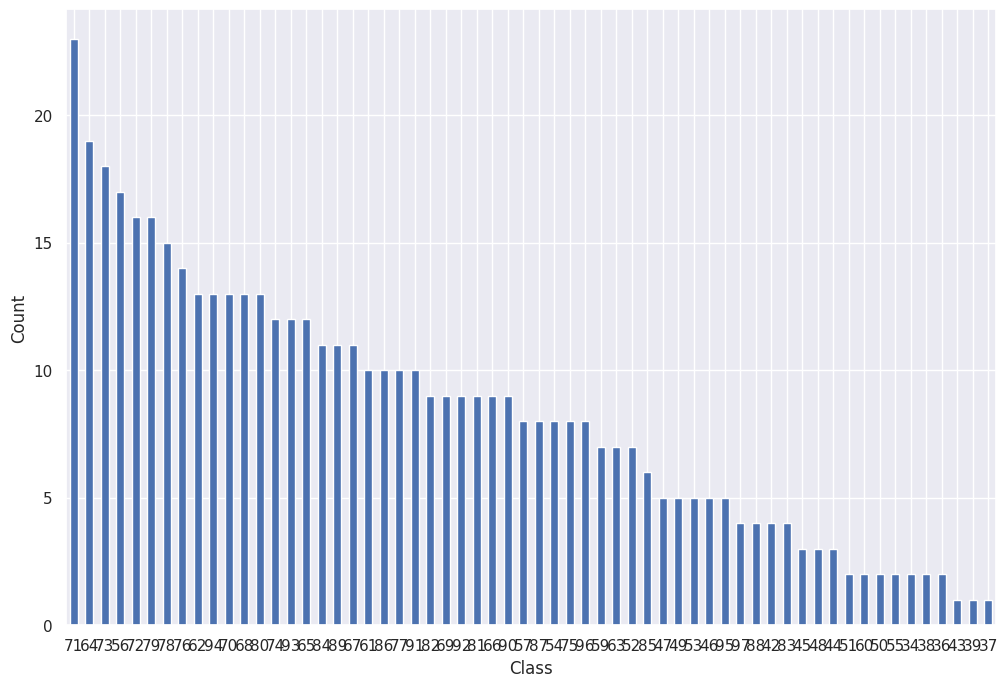

In [52]:
Y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<ipython-input-53-2ae9b7838308>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


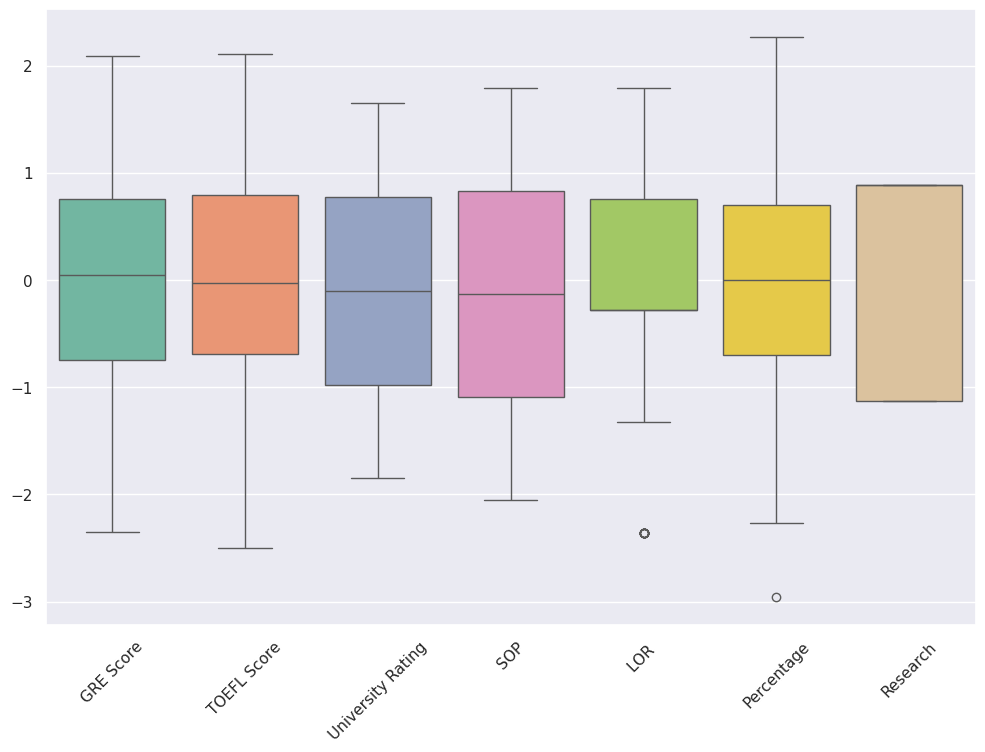

In [53]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-54-e6c0e365a313>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


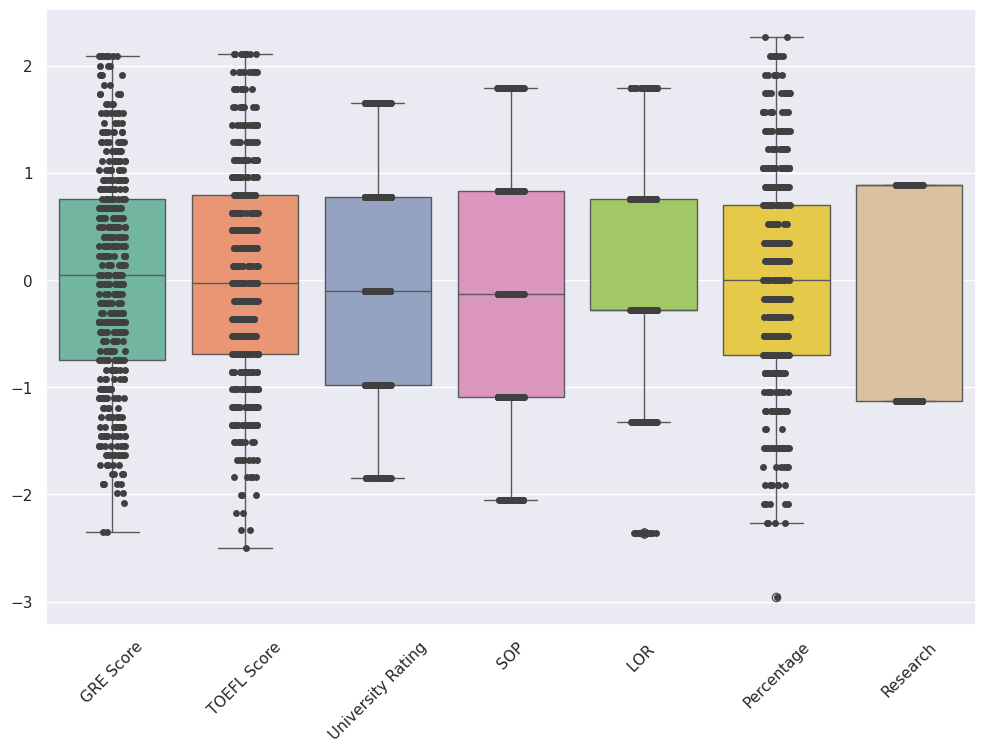

In [54]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [55]:
df.describe()

GRE Score   TOEFL Score  University Rating           SOP  \
count  5.000000e+02  5.000000e+02       5.000000e+02  5.000000e+02   
mean   1.762146e-15  1.136868e-15       1.421085e-16  8.526513e-17   
std    1.001002e+00  1.001002e+00       1.001002e+00  1.001002e+00   
min   -2.346008e+00 -2.500419e+00      -1.850542e+00 -2.049609e+00   
25%   -7.508077e-01 -6.899523e-01      -9.751676e-01 -1.089155e+00   
50%    4.679255e-02 -3.160087e-02      -9.979274e-02 -1.287008e-01   
75%    7.557706e-01  7.913384e-01       7.755821e-01  8.317531e-01   
max    2.085104e+00  2.108041e+00       1.650957e+00  1.792207e+00   

               LOR   Percentage      Research  
count  5.000000e+02  500.000000  5.000000e+02  
mean  -4.263256e-17    0.000000 -7.815970e-17  
std    1.001002e+00    1.001002  1.001002e+00  
min   -2.361937e+00   -2.959679 -1.128152e+00  
25%   -2.845958e-01   -0.696395 -1.128152e+00  
50%   -2.845958e-01    0.000000  8.864053e-01  
75%    7.540750e-01    0.696395  8.864053e-01  
max    1.792746e+00    2.263284  8.864053e-01

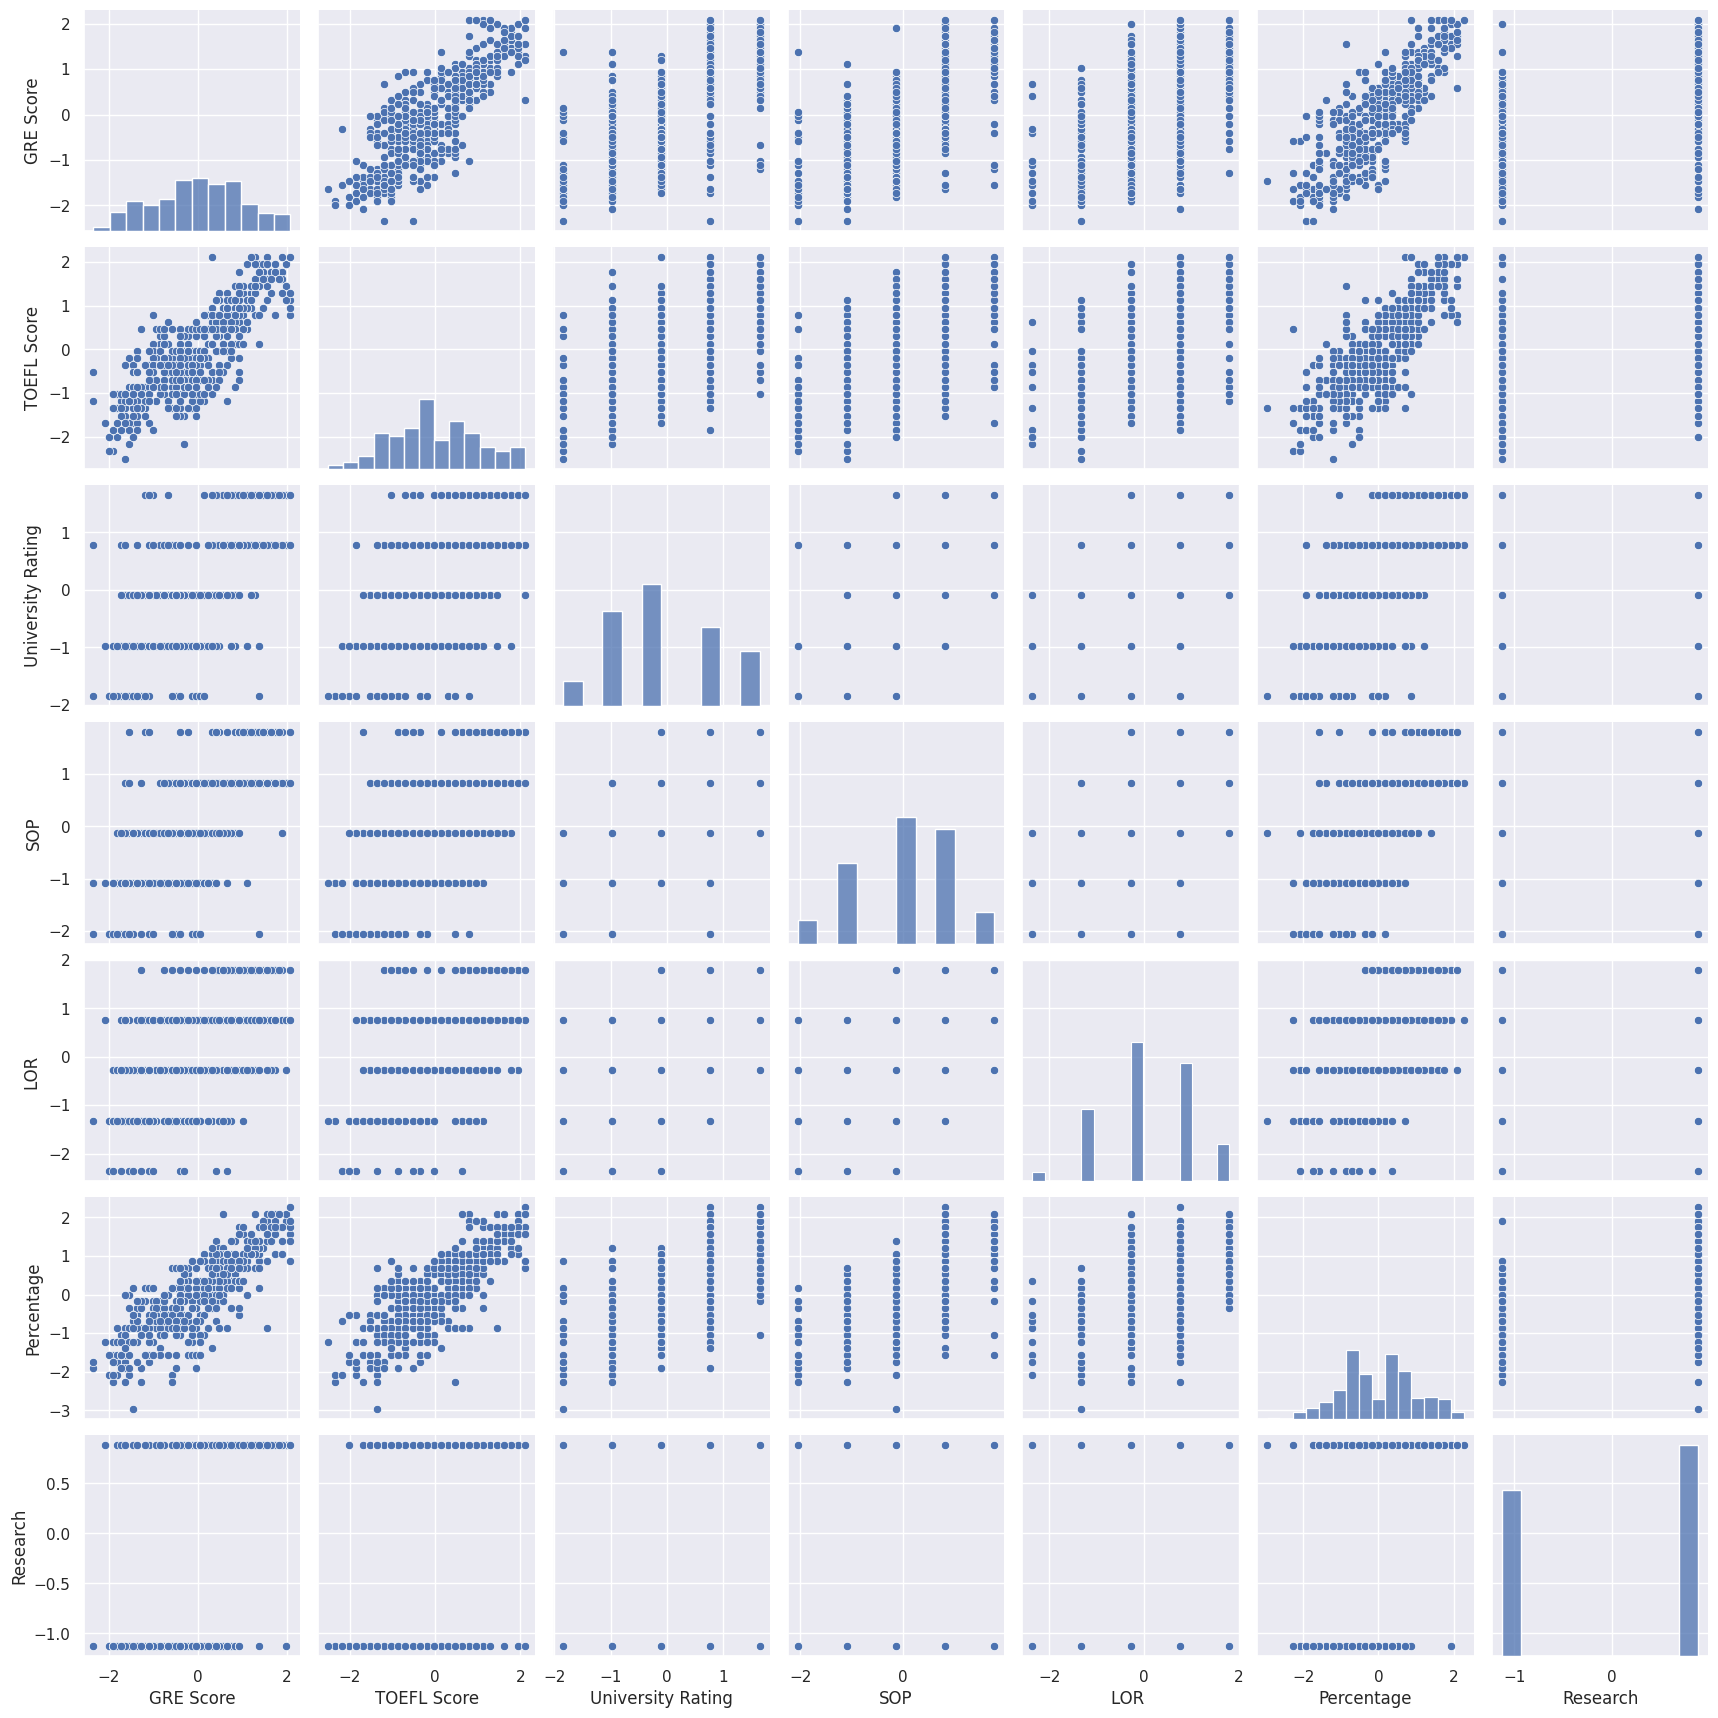

In [56]:
sns.pairplot(df)

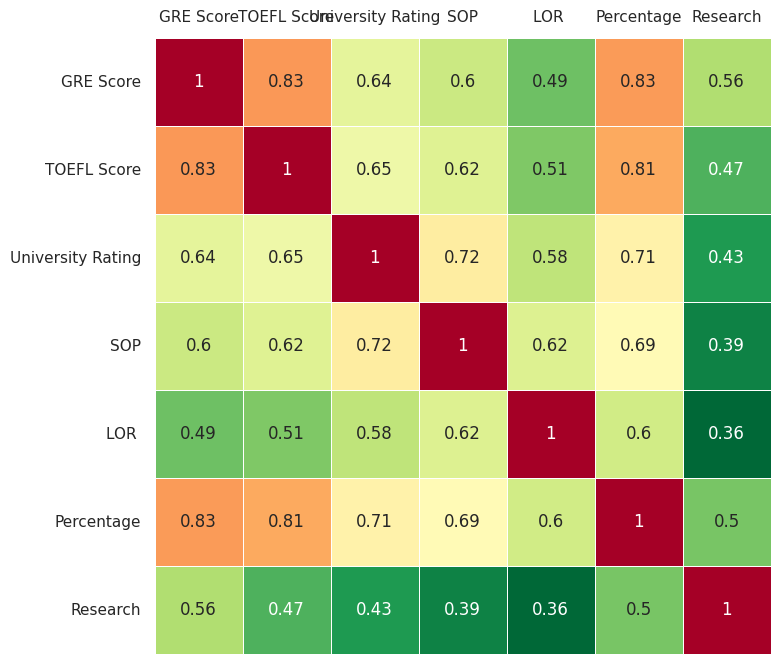

In [57]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Text(0, 0.5, '$Z_2$')

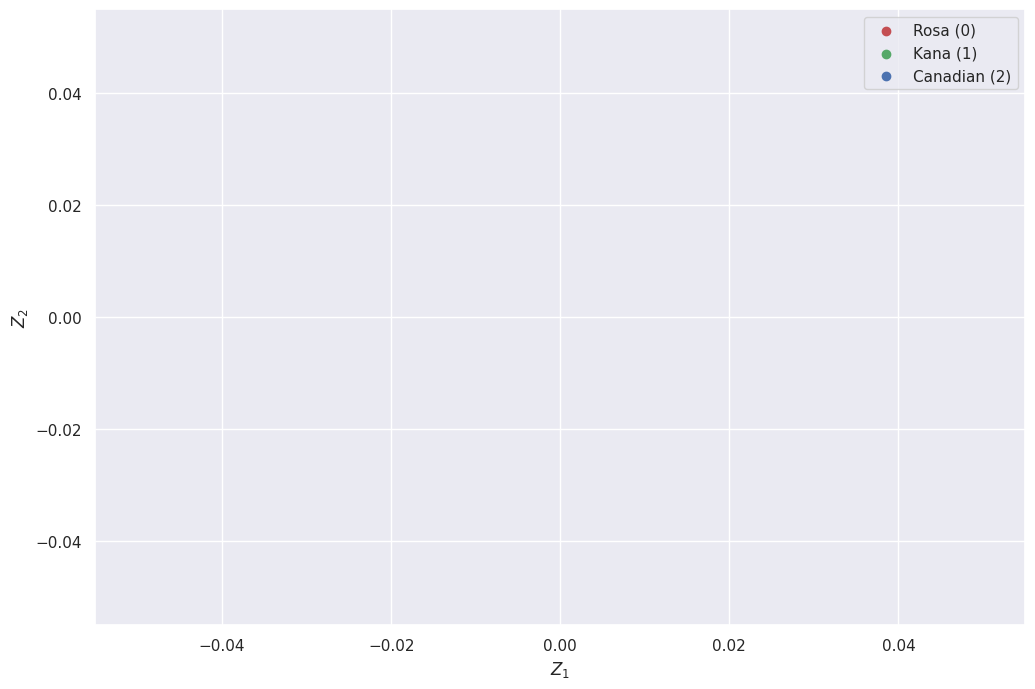

In [58]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(Y == 0)
idx_Kana = np.where(Y == 1)
idx_Canadian = np.where(Y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

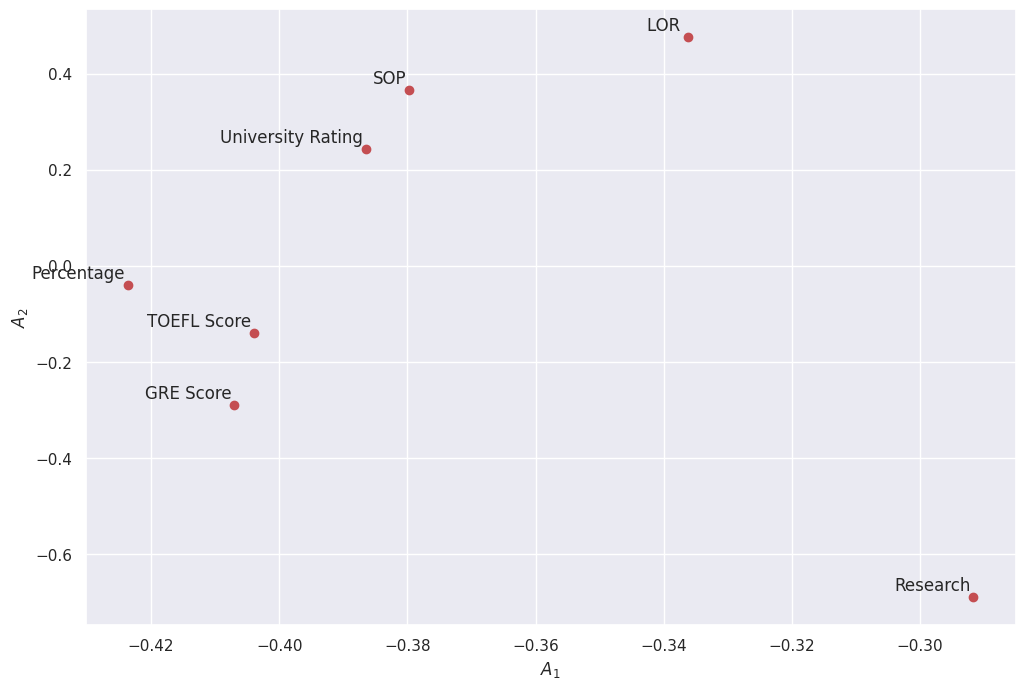

In [59]:
A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


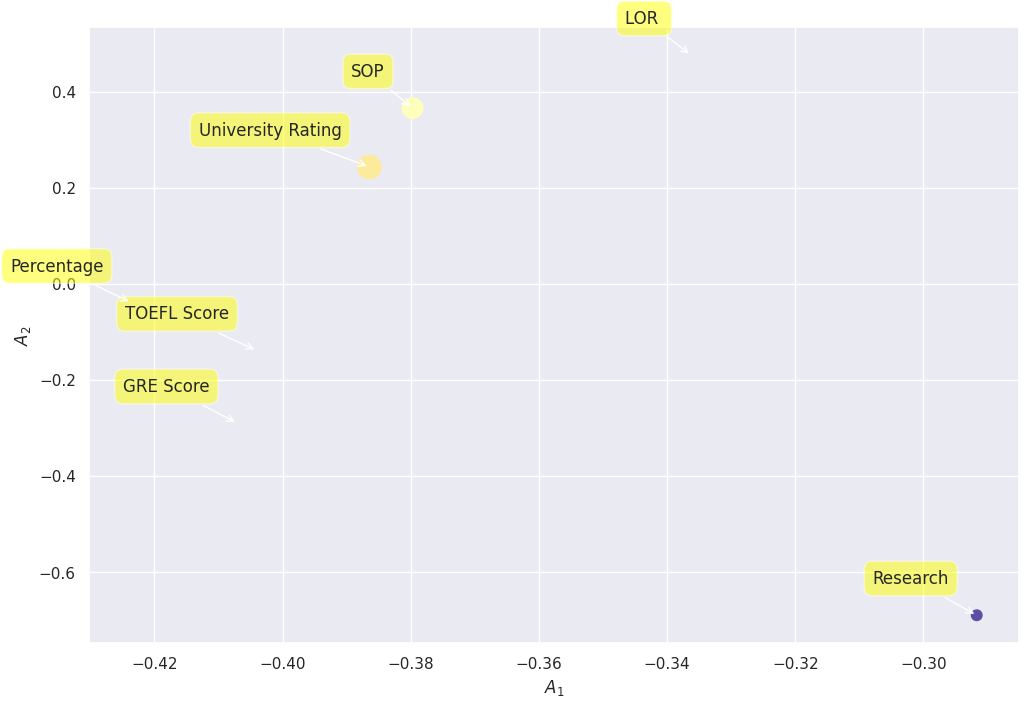

In [60]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

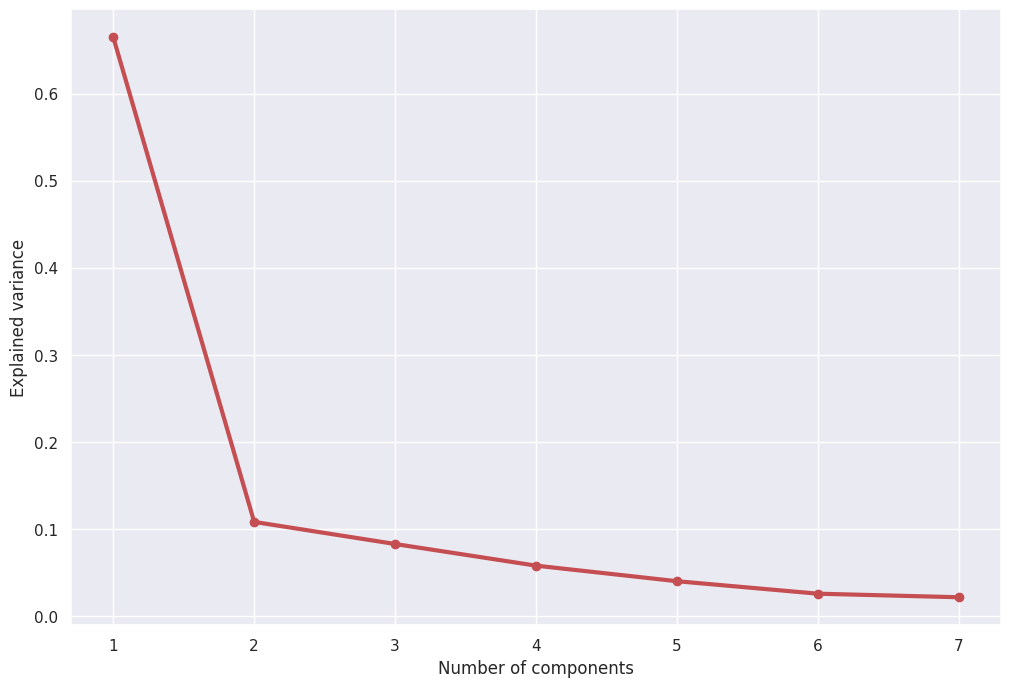

In [61]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()


Text(0, 0.5, 'Cumulative explained variance')

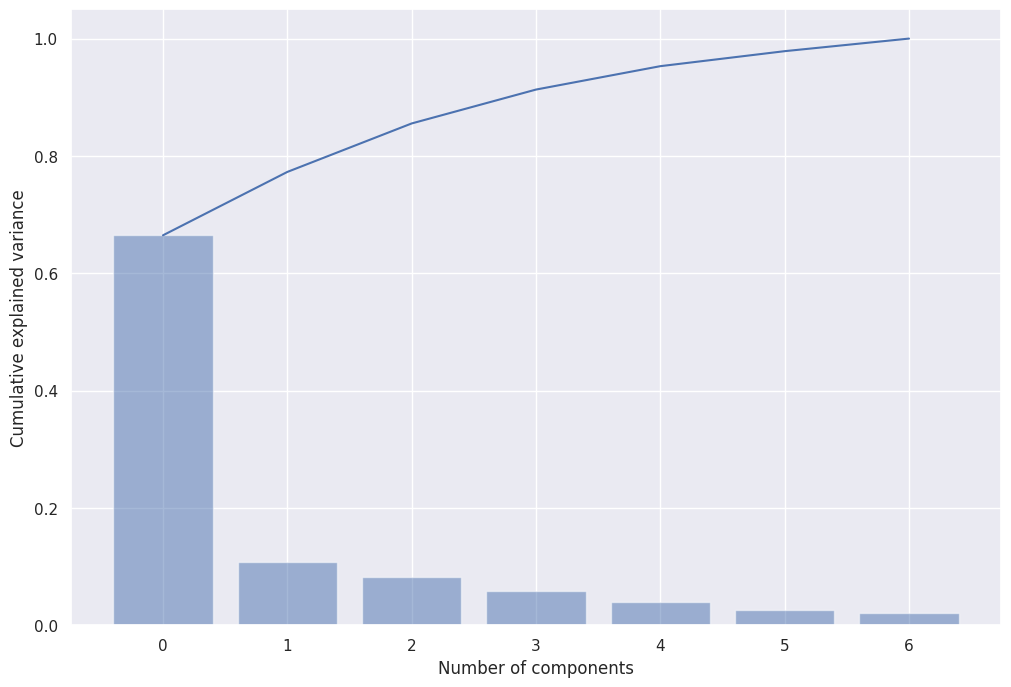

In [62]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [63]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (66.5%)',
 '1': 'PC 2 (10.8%)',
 '2': 'PC 3 (8.3%)',
 '3': 'PC 4 (5.8%)',
 '4': 'PC 5 (4.0%)',
 '5': 'PC 6 (2.6%)',
 '6': 'PC 7 (2.1%)'}

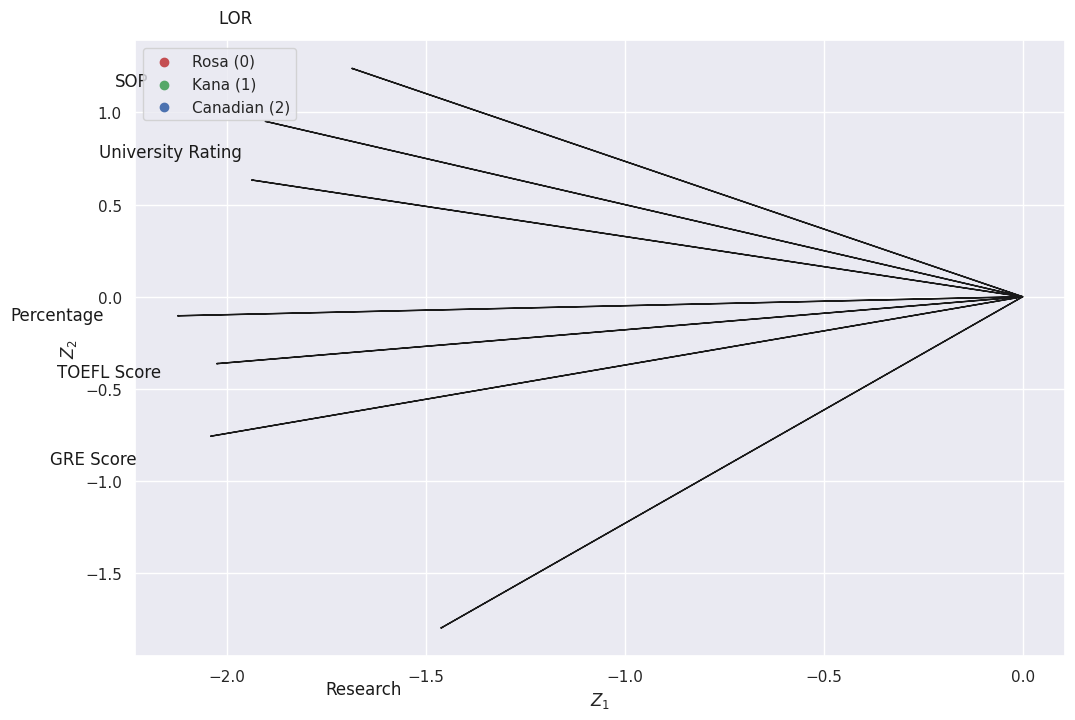

In [64]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [65]:
!pip install pca

In [66]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [67]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC            feature   loading  type
0  PC1         Percentage -0.423606  best
1  PC2           Research -0.689999  best
2  PC3           Research  0.638550  best
3  PC4               LOR  -0.628194  best
4  PC5                SOP -0.714115  best
5  PC1          GRE Score -0.407032  weak
6  PC3        TOEFL Score -0.432770  weak
7  PC5  University Rating  0.686240  weak


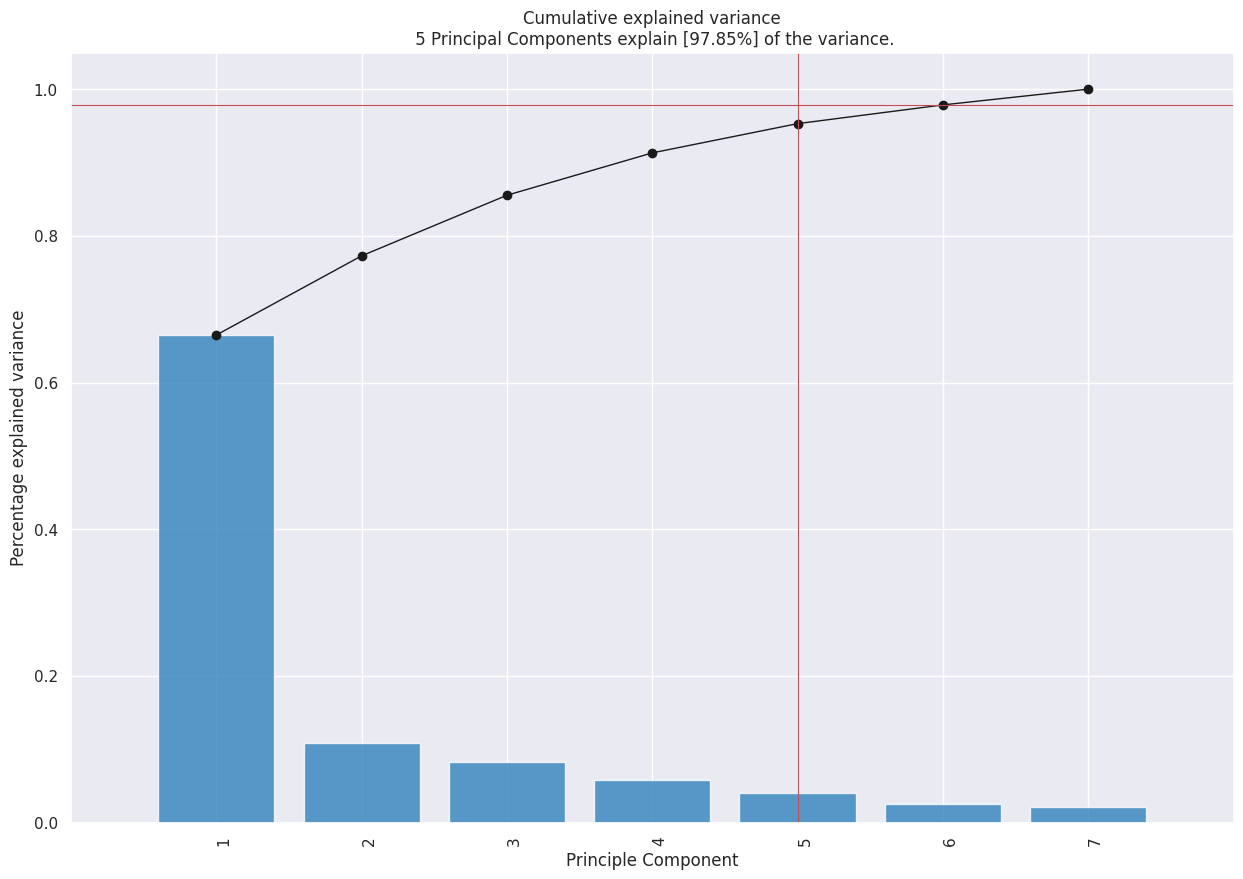

In [68]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


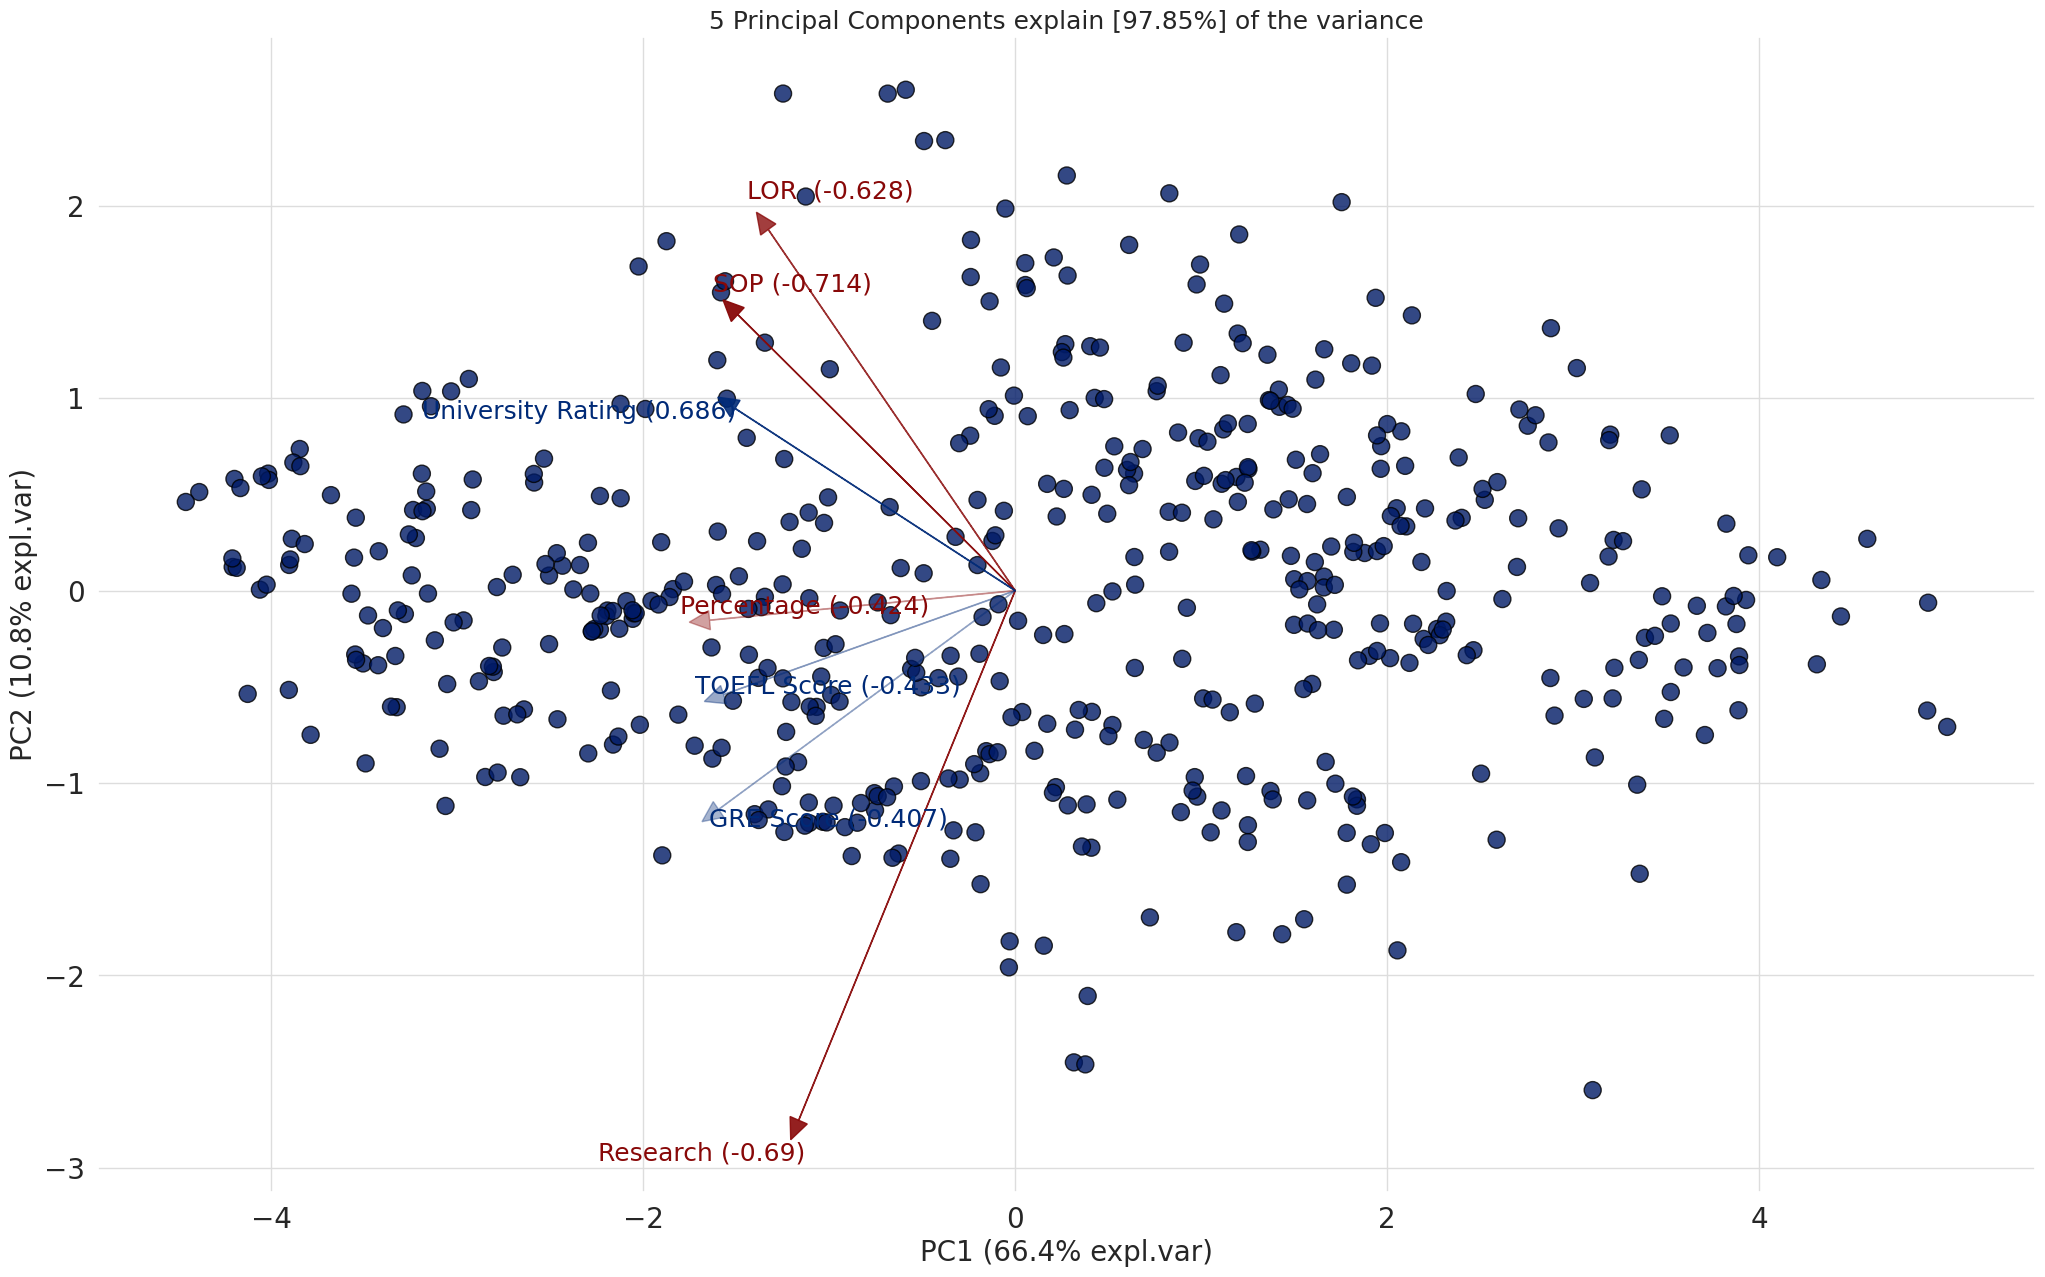

In [69]:
 ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.85%] of the variance'}, xlabel='PC1 (66.4% expl.var)', ylabel='PC2 (10.8% expl.var)'>)

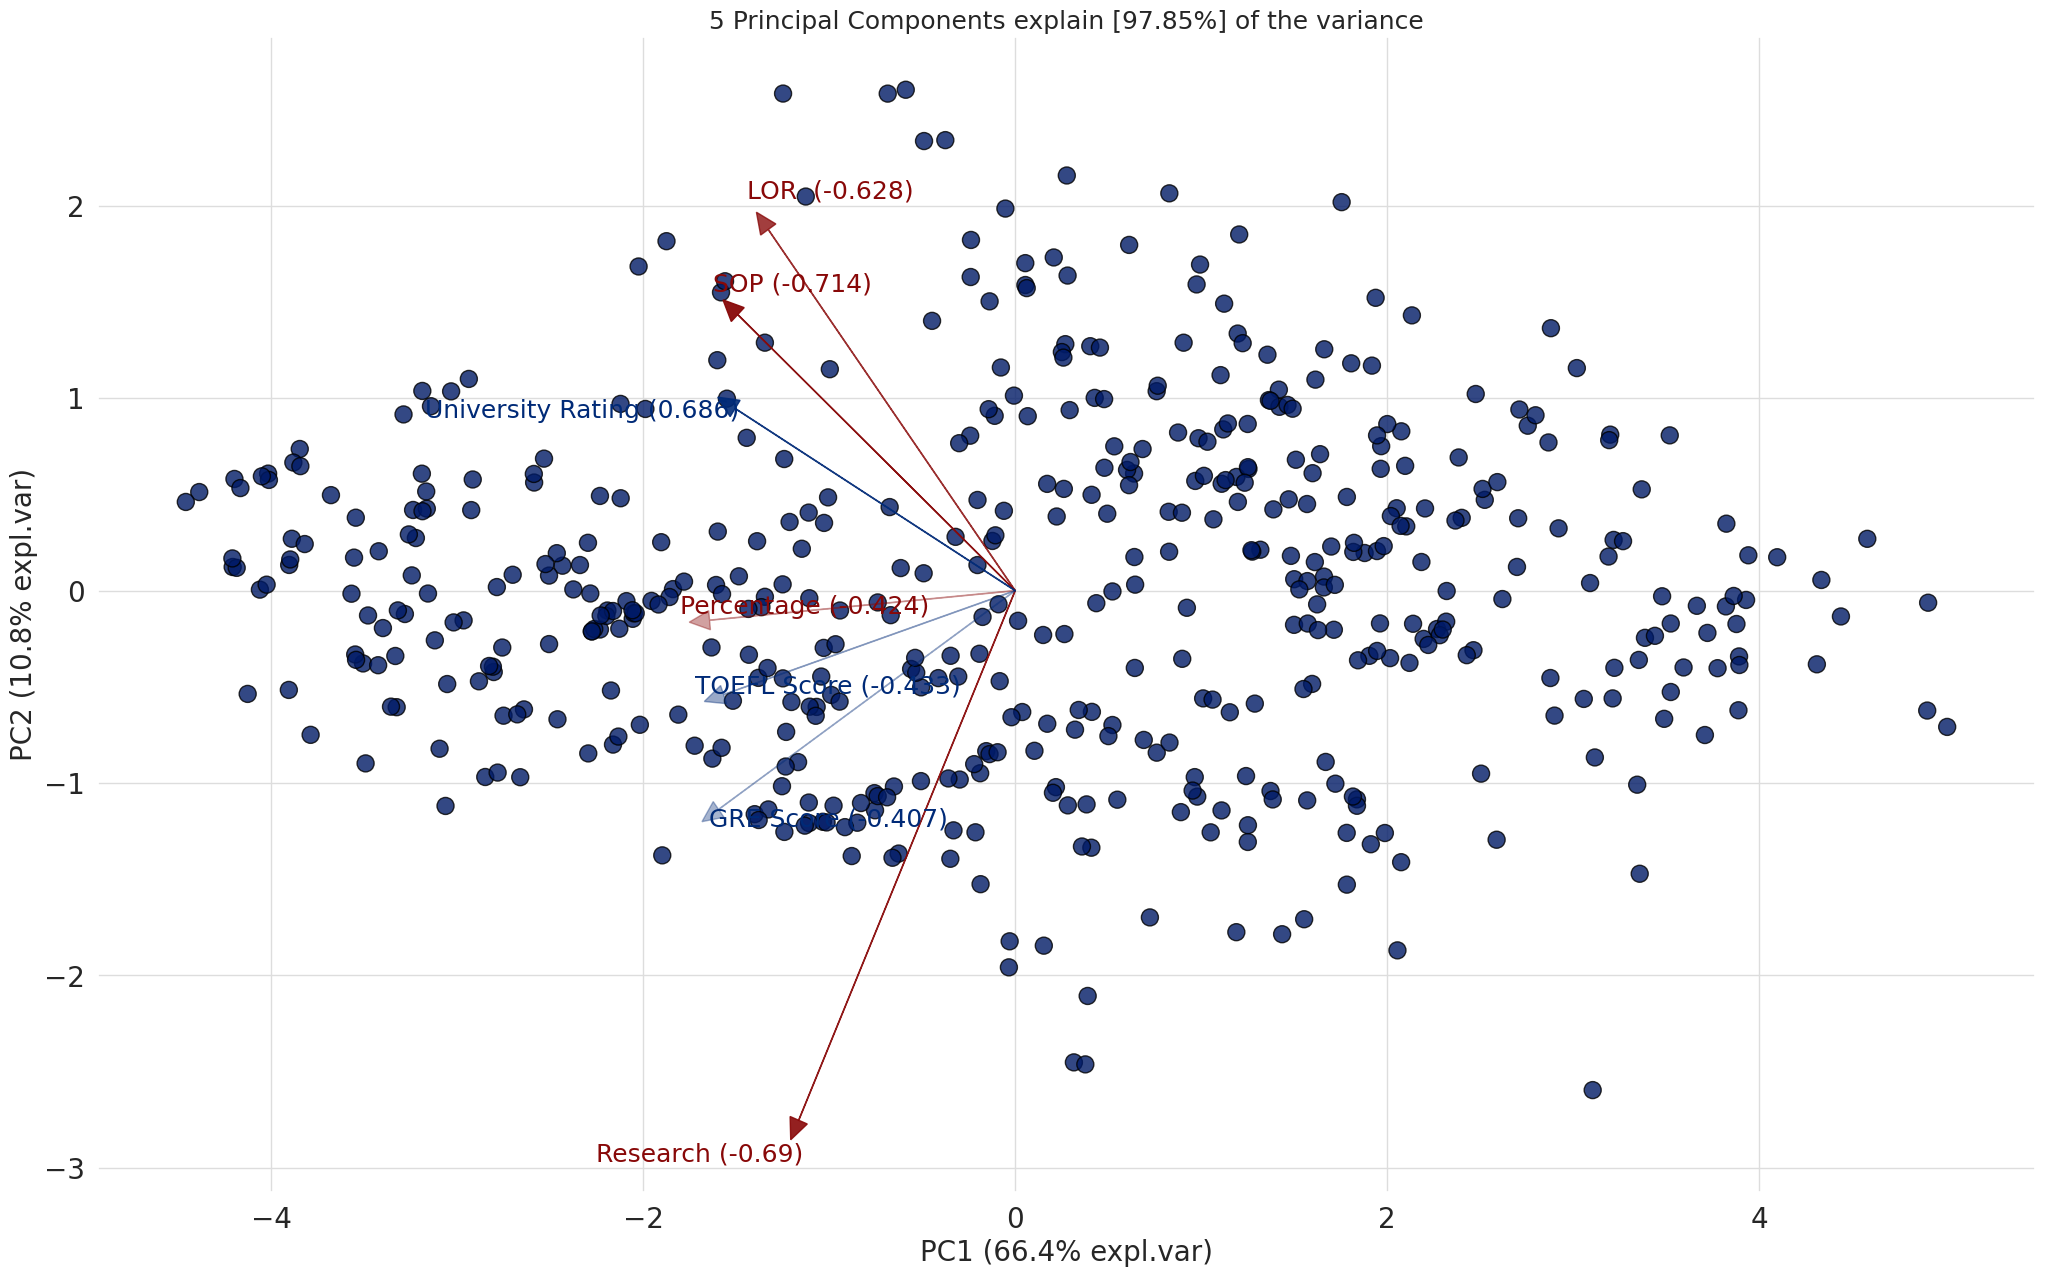

In [70]:
model.biplot(legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.85%] of the variance'}, xlabel='PC1 (66.4% expl.var)', ylabel='PC2 (10.8% expl.var)'>)

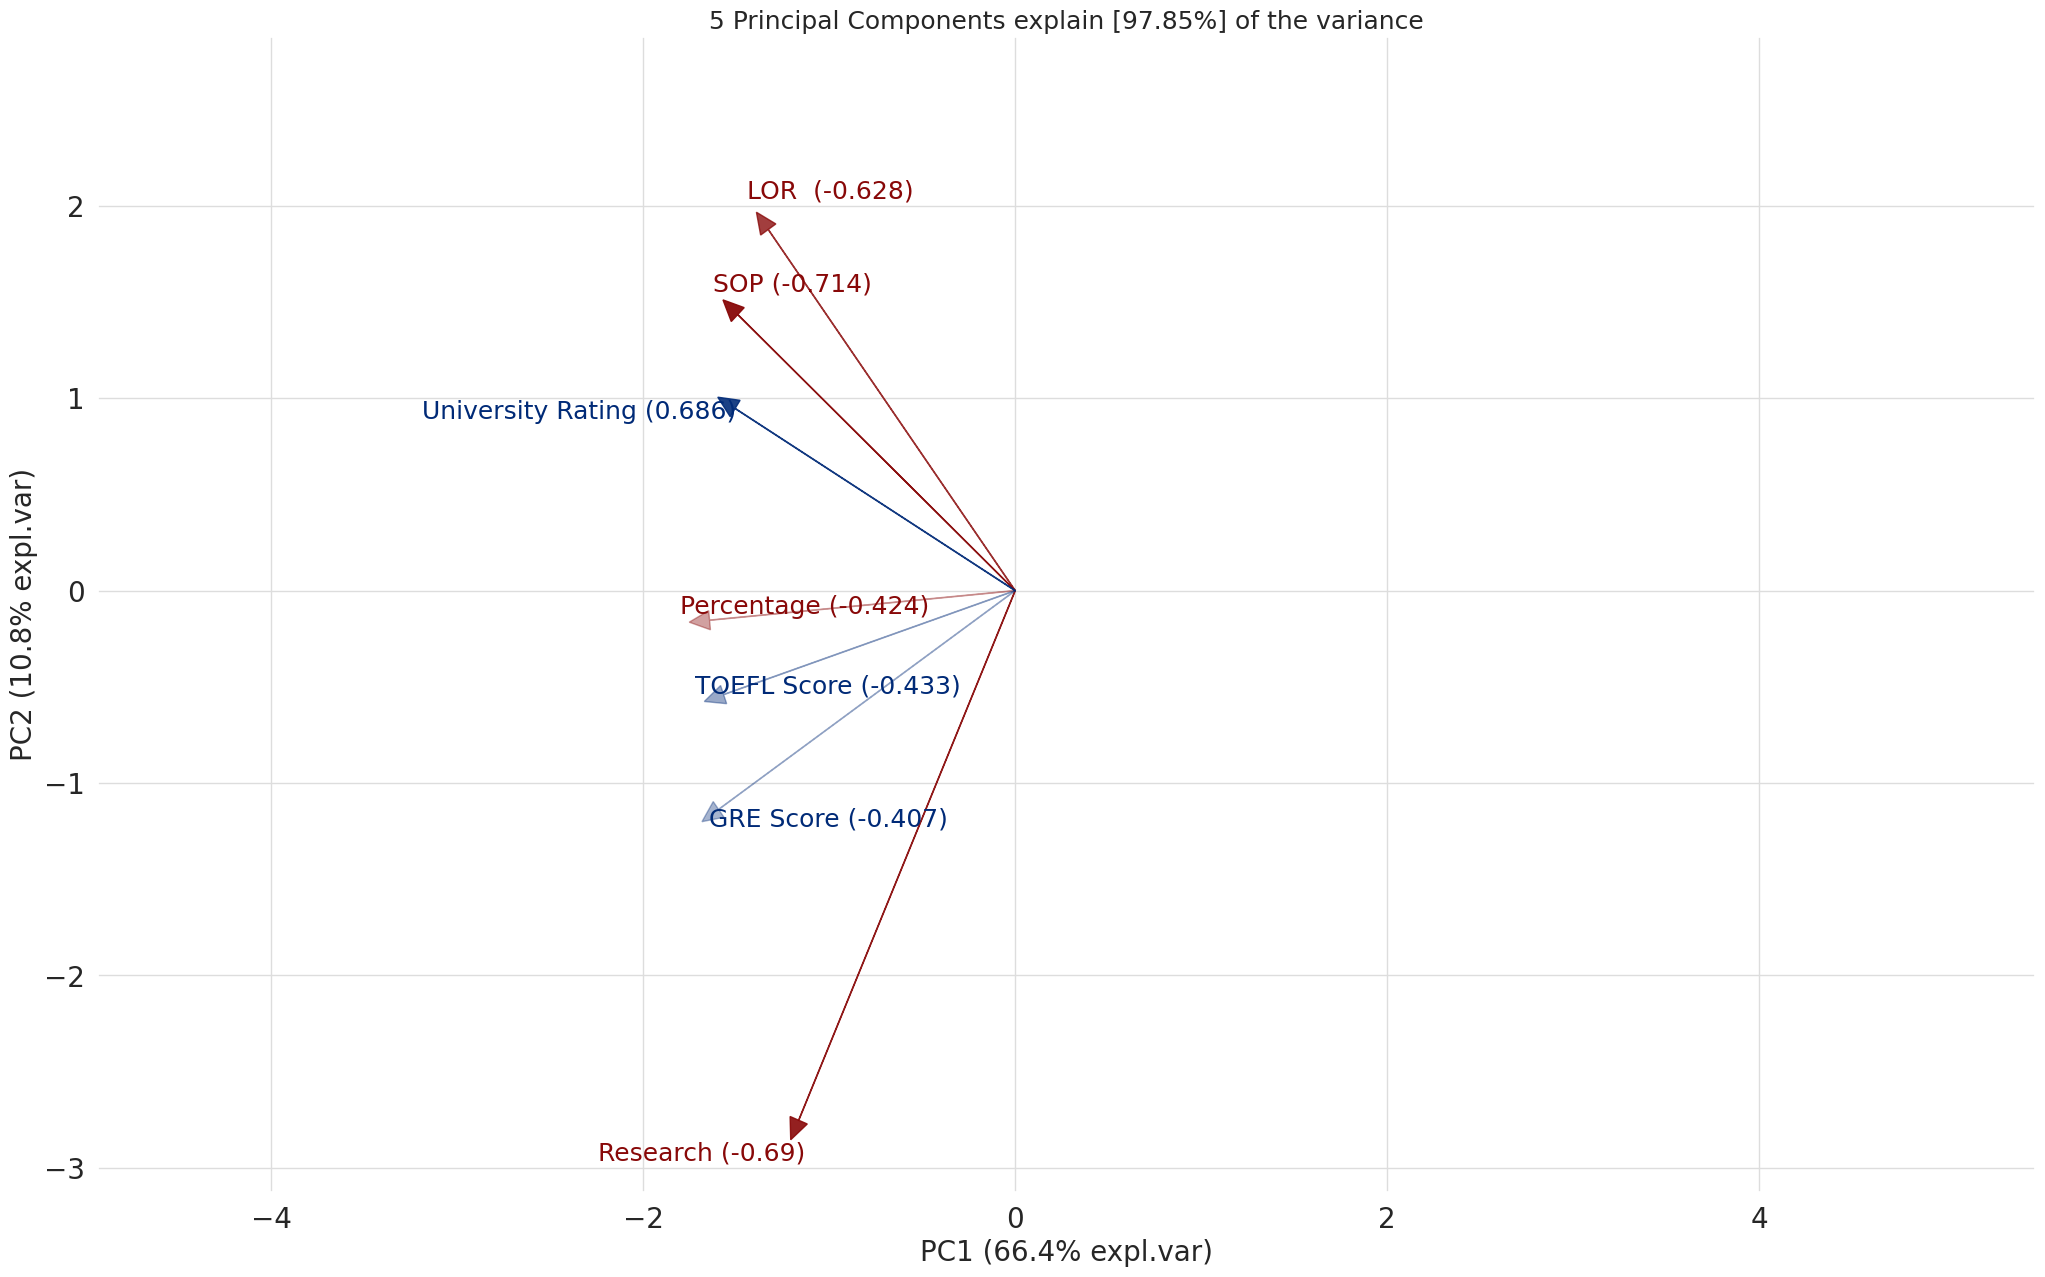

In [71]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


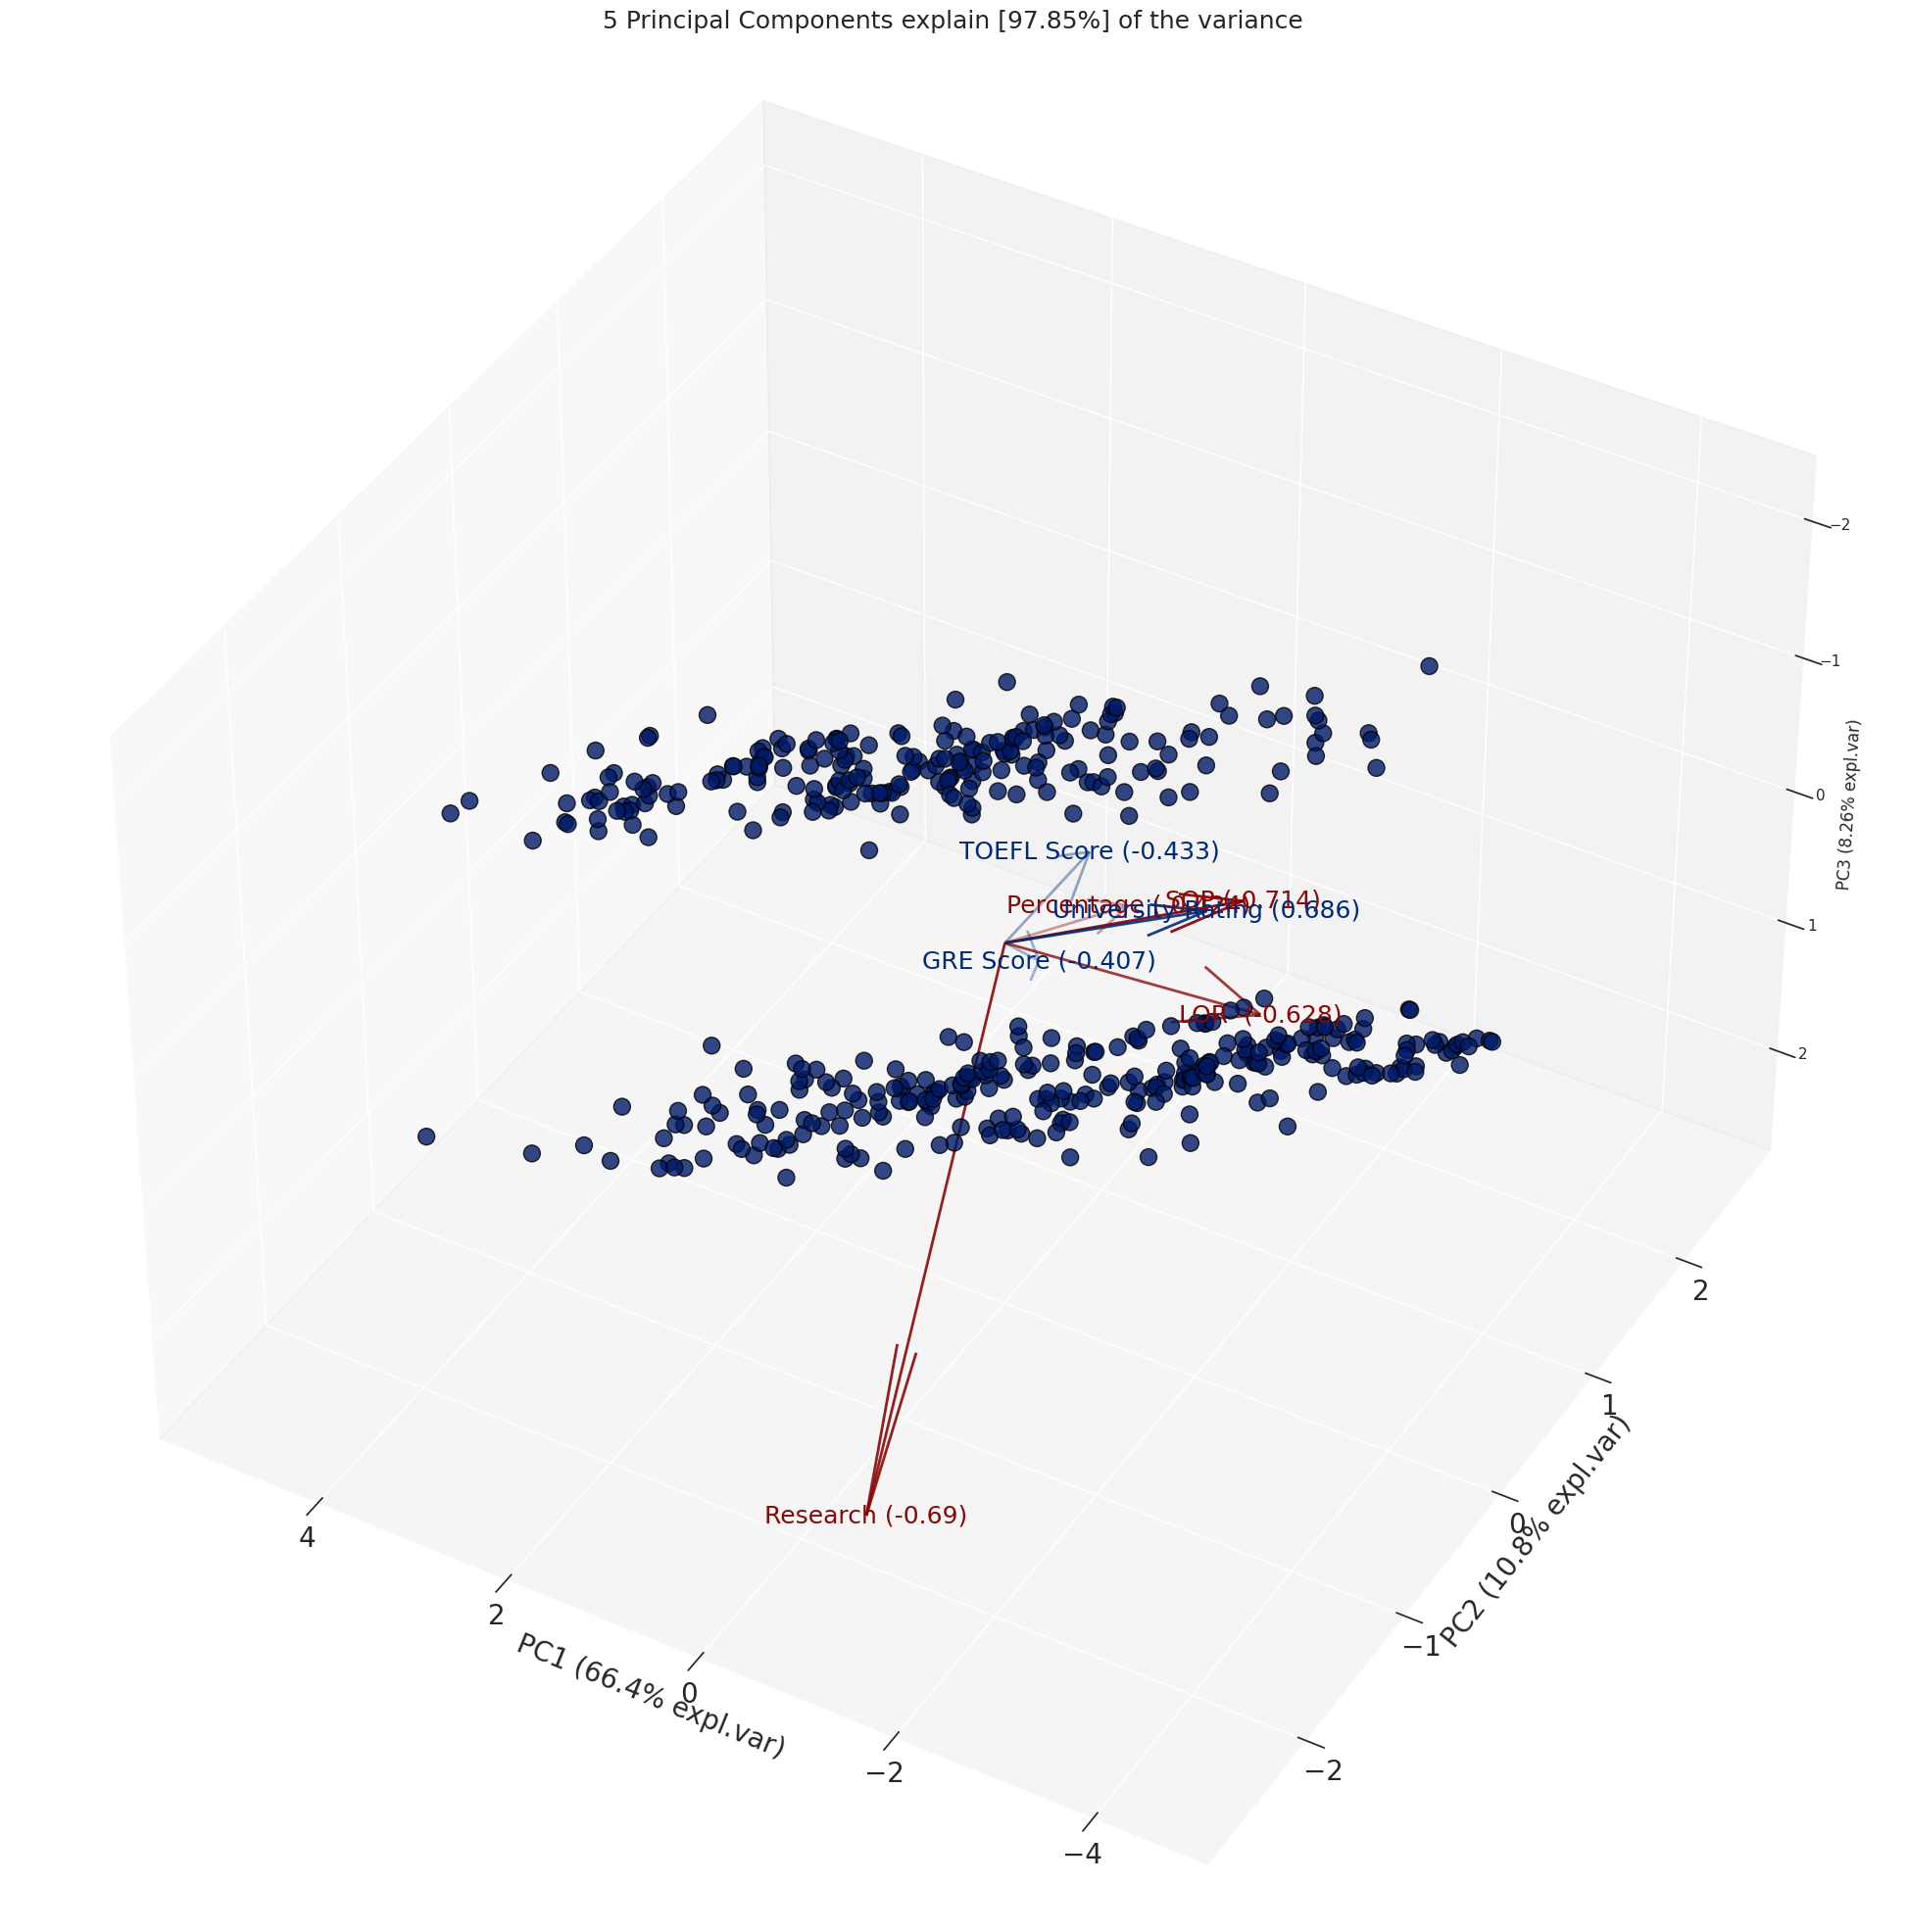

In [72]:
ax = model.biplot3d(legend=False)

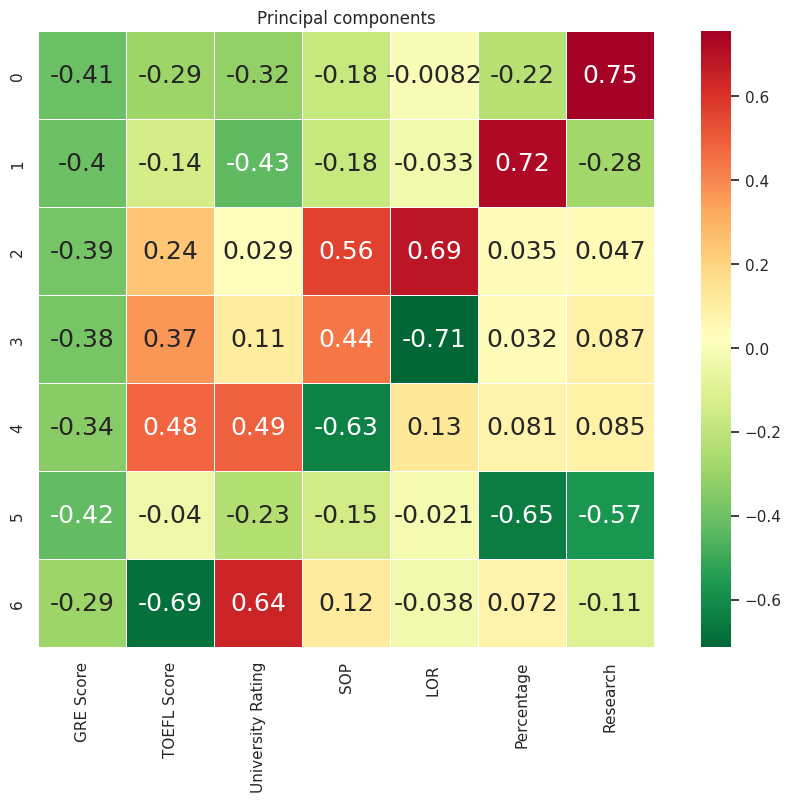

PC1:[-0.40703207 -0.4040102  -0.38645209 -0.37970846 -0.33624154 -0.42360628
 -0.29167838]
PC2:[-0.29035438 -0.13930849  0.24304508  0.36531726  0.47548901 -0.03964817
 -0.68999862]


In [73]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
# ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

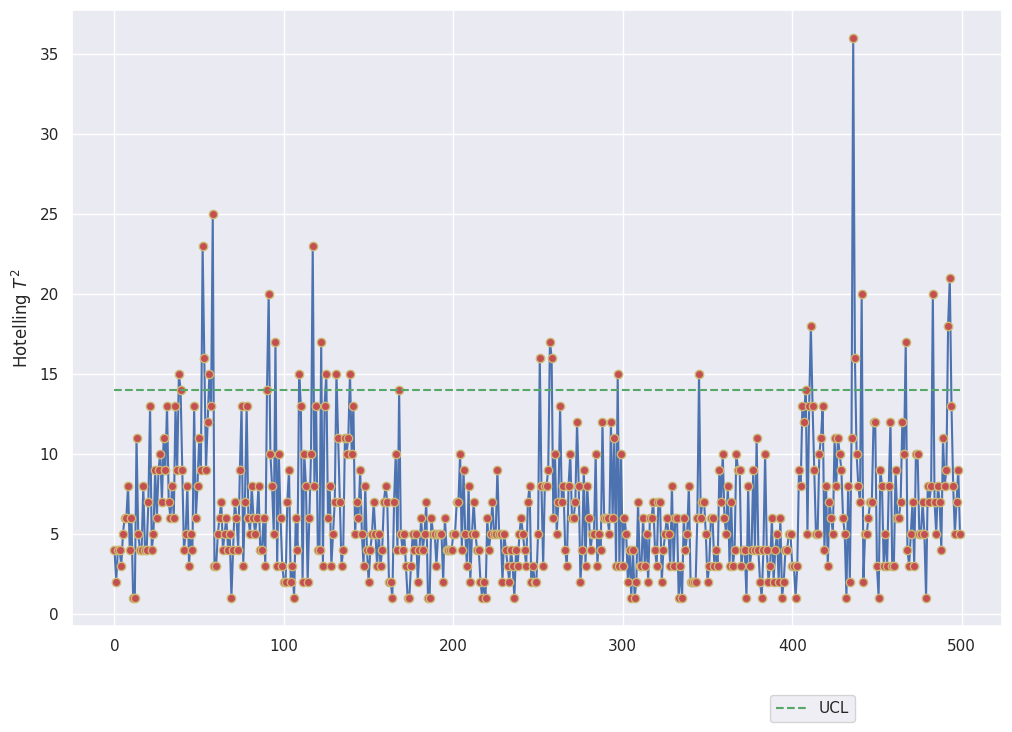

In [74]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [75]:
print(np.argwhere(Tsquare>UCL))

[[ 38]
 [ 39]
 [ 52]
 [ 53]
 [ 56]
 [ 58]
 [ 90]
 [ 91]
 [ 95]
 [109]
 [117]
 [122]
 [125]
 [131]
 [139]
 [168]
 [251]
 [257]
 [258]
 [297]
 [345]
 [408]
 [411]
 [436]
 [437]
 [441]
 [467]
 [483]
 [492]
 [493]]


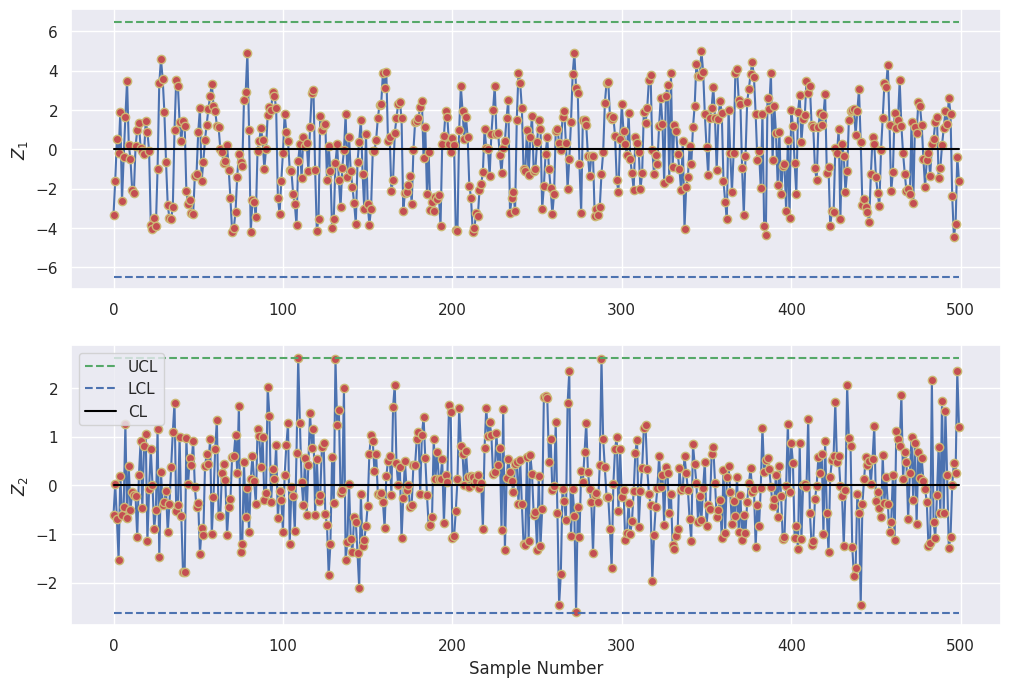

In [76]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

In [77]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


In [78]:
# Test-Train Split

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 350
Test Dataset Size: 150


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

          34      0.000     0.000     0.000         0
          36      0.000     0.000     0.000         0
          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      1.000     1.000     1.000         1
          45      0.000     0.000     0.000         0
          47      0.000     0.000     0.000         1
          48      0.000     0.000     0.000         2
          49      0.000     0.000     0.000         2
          50      0.000     0.000     0.000         1
          51      0.000     0.000     0.000         0
          52      0.000     0.000     0.000         2
          53      0.000     0.000     0.000         3
          54      0.000     0.000     0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

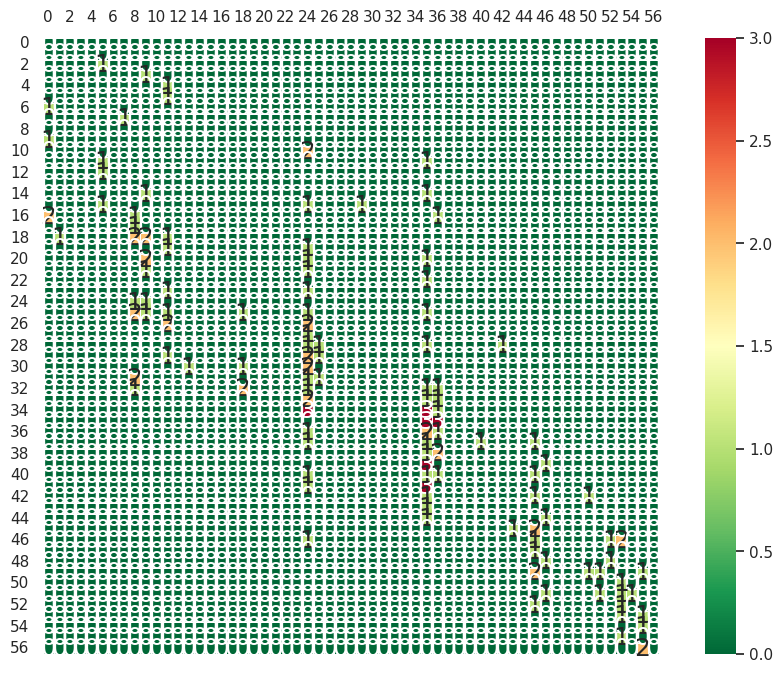

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

          36      0.000     0.000     0.000         0
          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      0.000     0.000     0.000         1
          45      0.000     0.000     0.000         0
          46      0.000     0.000     0.000         0
          47      0.000     0.000     0.000         1
          48      0.000     0.000     0.000         2
          49      0.250     0.500     0.333         2
          50      0.000     0.000     0.000         1
          52      0.000     0.000     0.000         2
          53      0.000     0.000     0.000         3
          54      0.000     0.000     0.000         4
          55      0.000     0.000     0.000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

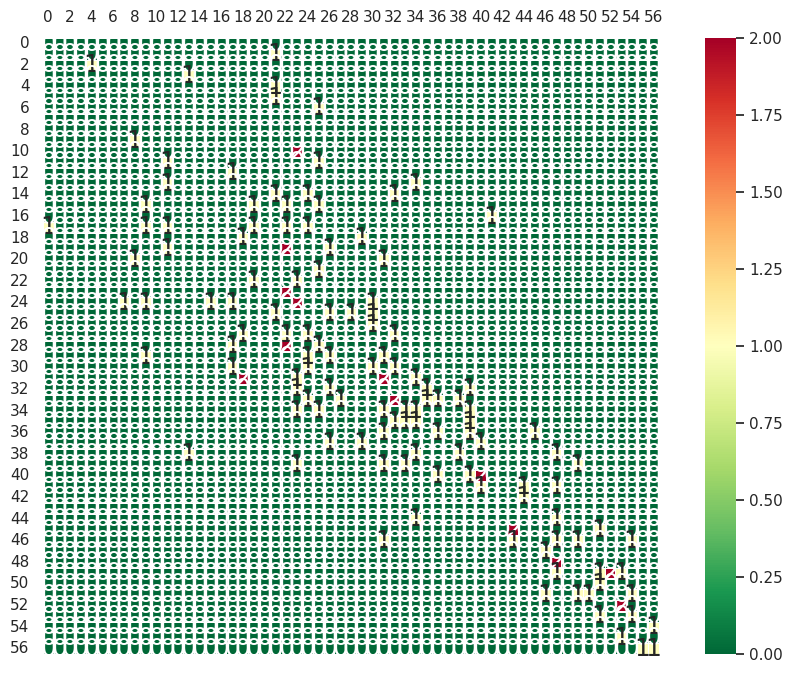

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

          34      0.000     0.000     0.000         0
          36      0.000     0.000     0.000         0
          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      0.000     0.000     0.000         1
          45      0.000     0.000     0.000         0
          46      0.000     0.000     0.000         0
          47      0.000     0.000     0.000         1
          48      0.000     0.000     0.000         2
          49      0.000     0.000     0.000         2
          50      0.000     0.000     0.000         1
          52      0.000     0.000     0.000         2
          53      0.000     0.000     0.000         3
          54      0.000     0.000     0.000  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

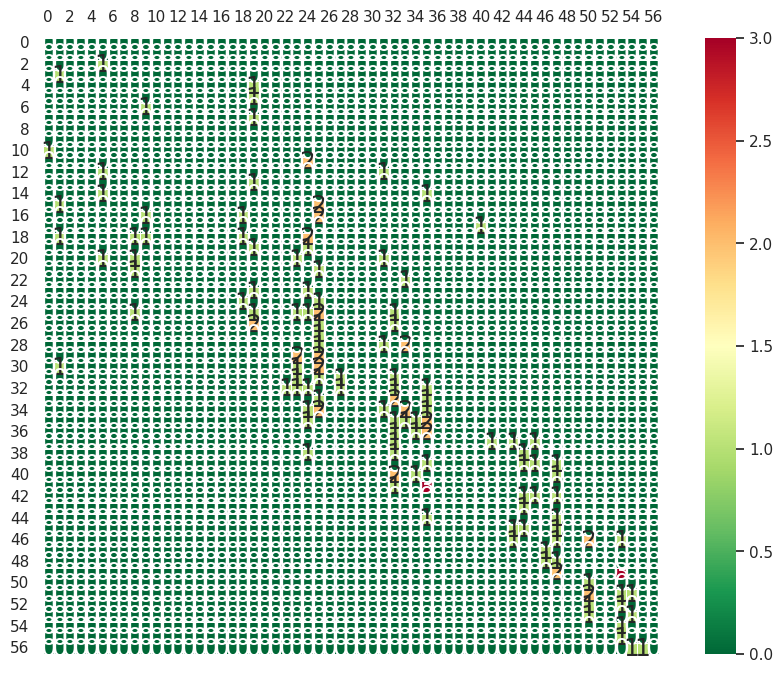

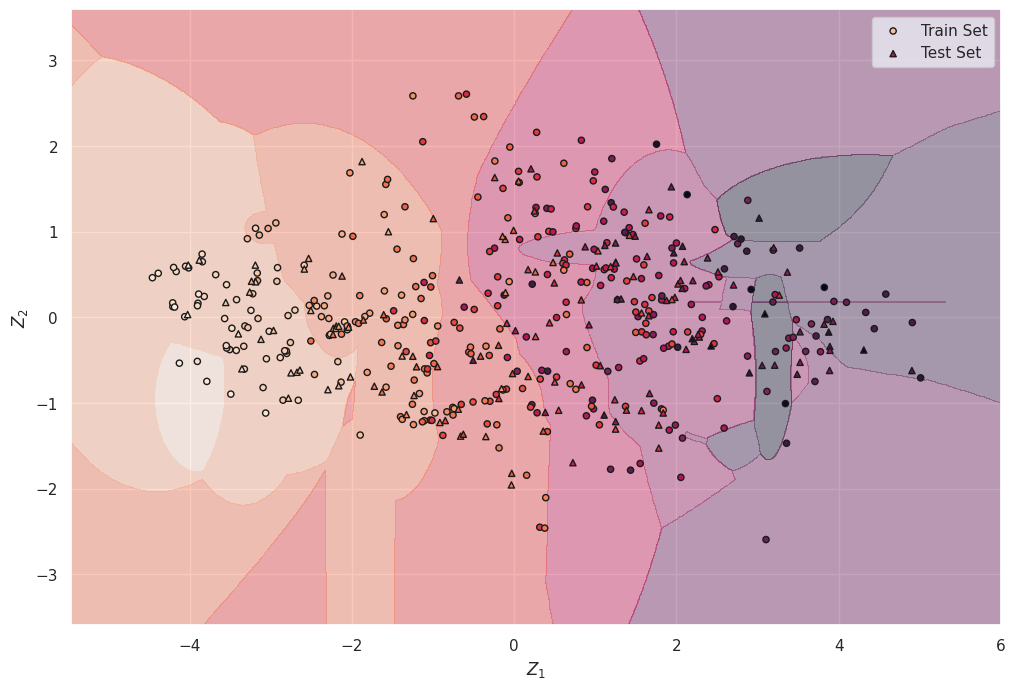

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  20,  22,  23,  24,  25,  26,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]),)


In [79]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Grid Search Results:
k_full_data: {'n_neighbors': 16}
k_Z: {'n_neighbors': 16}
k_Z12: {'n_neighbors': 16}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and

                                    0         1         2         3         4
knn_full_data fit_time       0.004017  0.003956  0.003973  0.005959  0.004186
knn_Z  fit_time              0.001640  0.001633  0.001634  0.001630  0.003935
knn_Z12 fit_time             0.001771  0.001577  0.001559  0.004395  0.002839
knn_full_data test_f1_macro  0.064977  0.089976  0.012422  0.058050  0.018308
knn_Z  test_f1_macro         0.064977  0.079106  0.012422  0.058050  0.018308
knn_Z12 test_f1_macro        0.049409  0.044928  0.030797  0.059226  0.035909

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

          34      0.000     0.000     0.000         0
          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      1.000     1.00

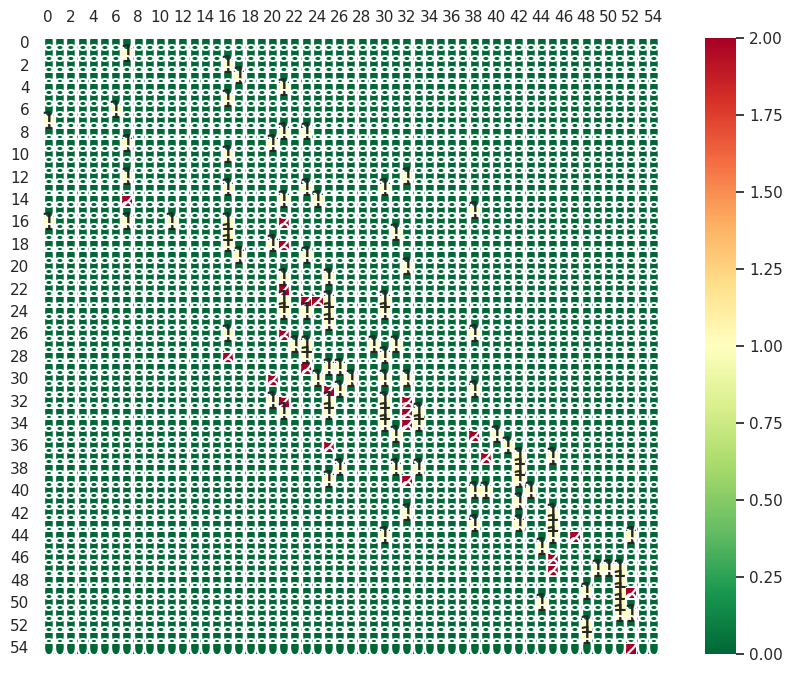

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

          34      0.000     0.000     0.000         0
          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      1.000     1.000     1.000         1
          47      0.000     0.000     0.000         1
          48      0.000     0.000     0.000         2
          49      0.000     0.000     0.000         2
          50      0.000     0.000     0.000         1
          51      0.000     0.000     0.000         0
          52      0.000     0.000     0.000         2
          53      0.000     0.000     0.000         3
          54      0.000     0.000     0.000         4
          55      0.000     0.000     0.000         1
          56      0.100     0.167     0.125    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

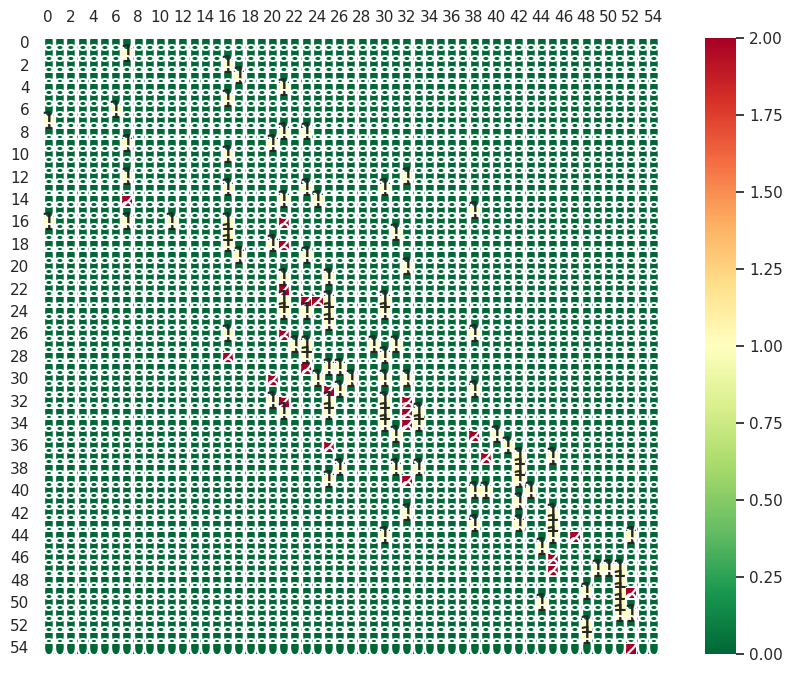

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      0.000     0.000     0.000         1
          45      0.000     0.000     0.000         0
          47      0.000     0.000     0.000         1
          48      0.000     0.000     0.000         2
          49      0.000     0.000     0.000         2
          50      0.000     0.000     0.000         1
          52      0.000     0.000     0.000         2
          53      0.000     0.000     0.000         3
          54      0.000     0.000     0.000         4
          55      0.000     0.000     0.000         1
          56      0.133     0.333     0.190         6
          57      0.000     0.000     0.000  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

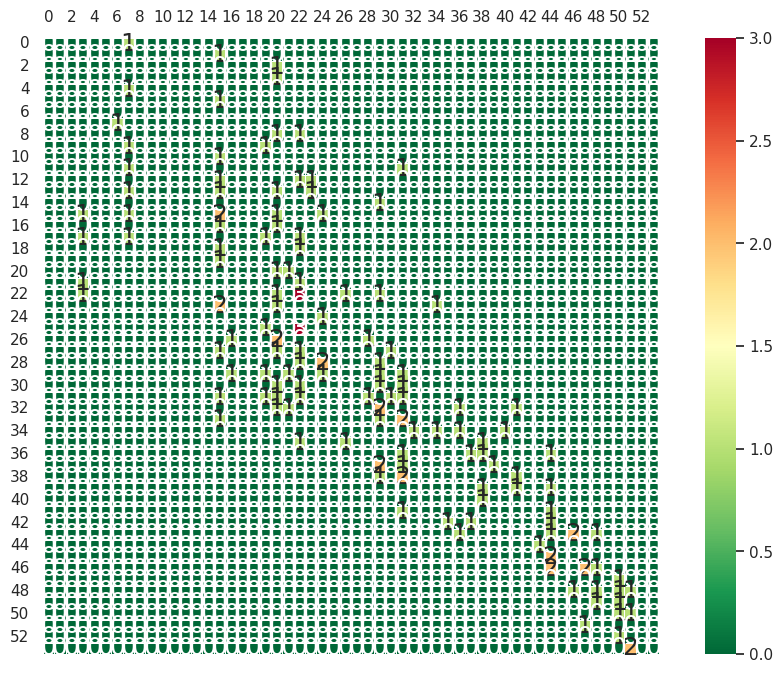

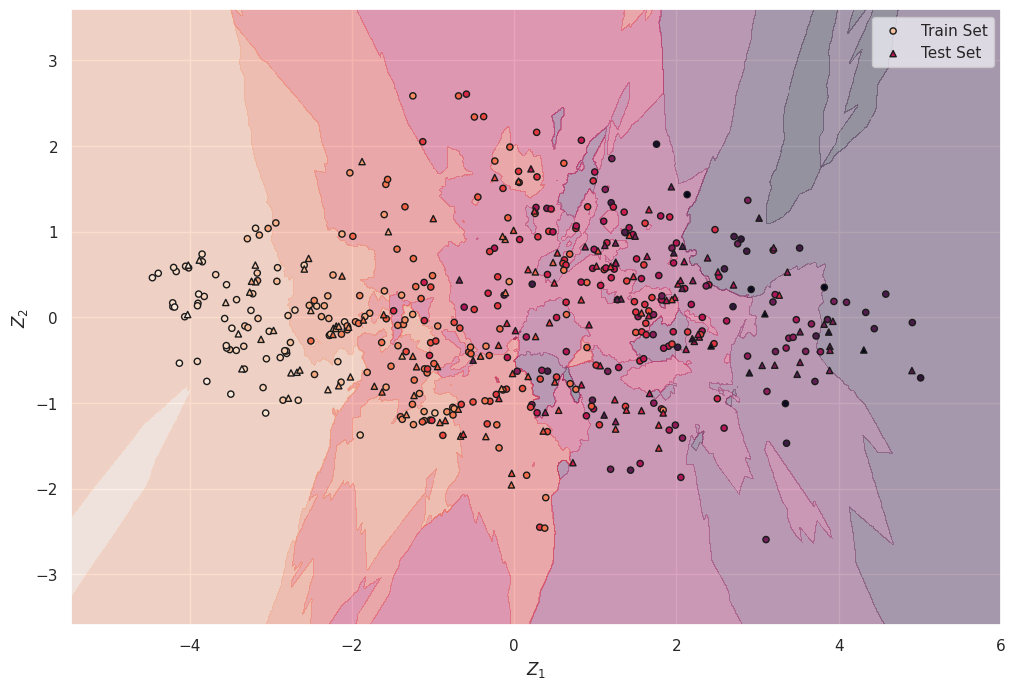

In [80]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.003024  0.002178  0.002270  0.002165  0.003868
dt_Z  fit_time              0.002351  0.002248  0.002193  0.002309  0.002143
dt_Z12 fit_time             0.001237  0.001190  0.001261  0.001225  0.001243
dt_full_data test_f1_macro  0.051322  0.041391  0.057740  0.109886  0.052480
dt_Z  test_f1_macro         0.104350  0.084028  0.015680  0.069809  0.045564
dt_Z12 test_f1_macro        0.045896  0.045827  0.024298  0.041312  0.023543

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     

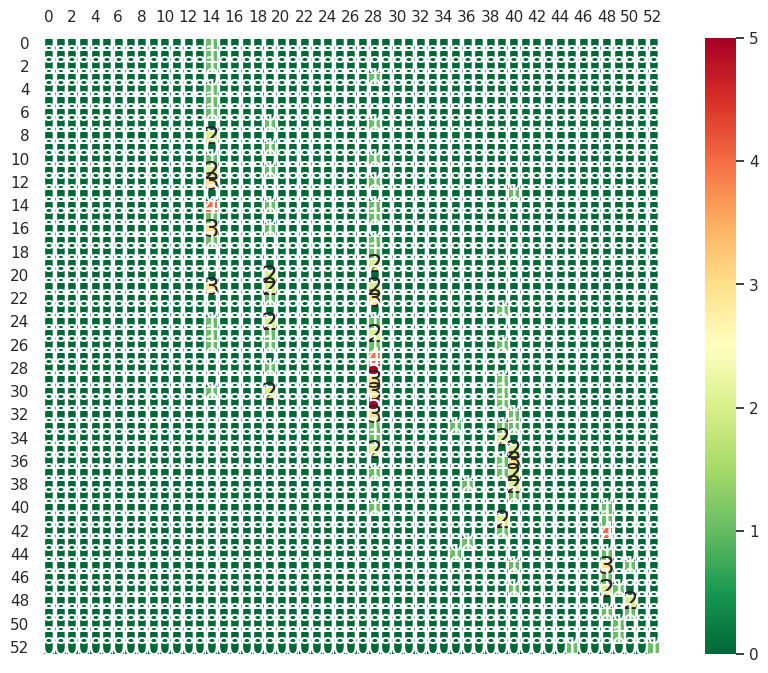

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      0.000     0.000     0.000         1
          47      0.000     0.000     0.000         1
          48      0.000     0.000     0.000         2
          49      0.000     0.000     0.000         2
          50      0.000     0.000     0.000         1
          52      0.000     0.000     0.000         2
          53      0.000     0.000     0.000         3
          54      0.000     0.000     0.000         4
          55      0.000     0.000     0.000         1
          56      0.286     0.333     0.308         6
          57      0.000     0.000     0.000         2
          59      0.000     0.000     0.000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


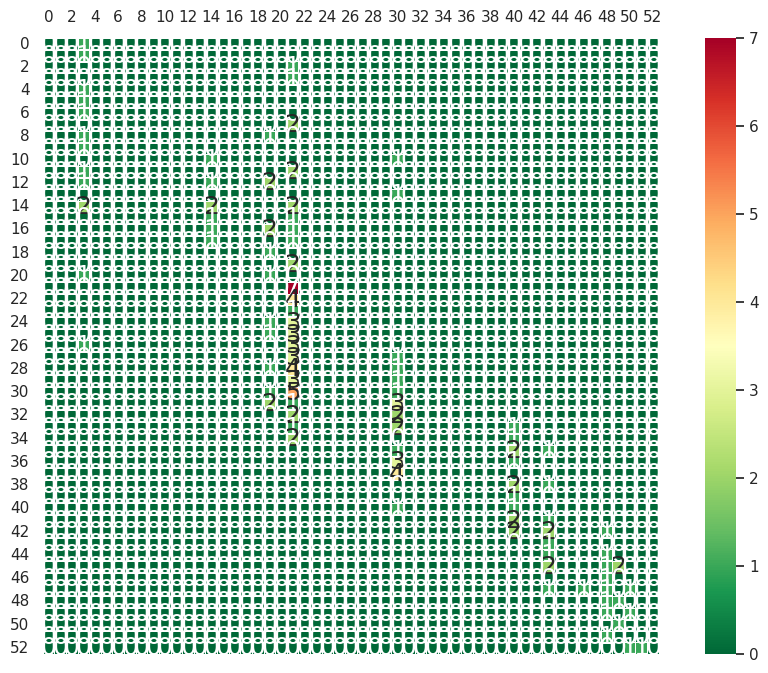

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

          37      0.000     0.000     0.000         1
          38      0.000     0.000     0.000         1
          39      0.000     0.000     0.000         1
          42      0.000     0.000     0.000         1
          43      0.000     0.000     0.000         1
          44      0.000     0.000     0.000         1
          47      0.000     0.000     0.000         1
          48      0.000     0.000     0.000         2
          49      0.000     0.000     0.000         2
          50      0.000     0.000     0.000         1
          52      0.000     0.000     0.000         2
          53      0.000     0.000     0.000         3
          54      0.000     0.000     0.000         4
          55      0.000     0.000     0.000         1
          56      0.087     0.333     0.138         6
          57      0.000     0.000     0.000         2
          59      0.000     0.000     0.000  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


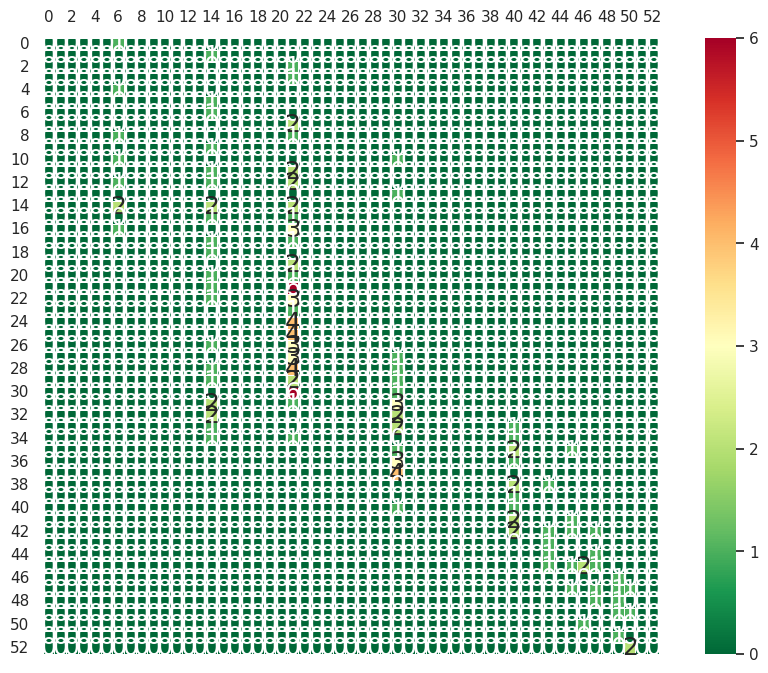

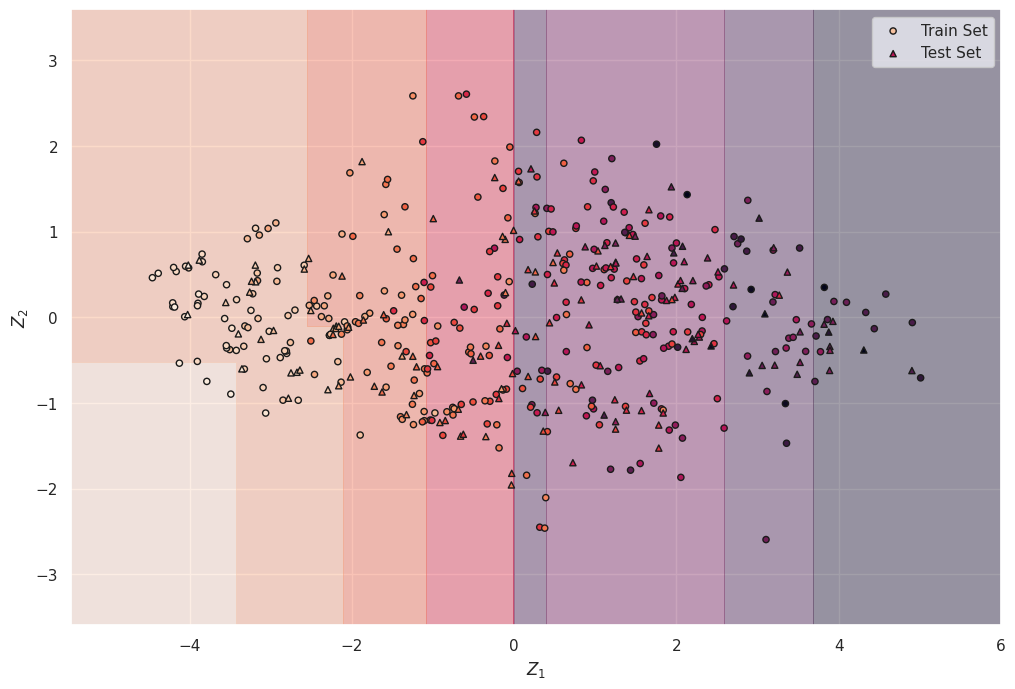

In [81]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

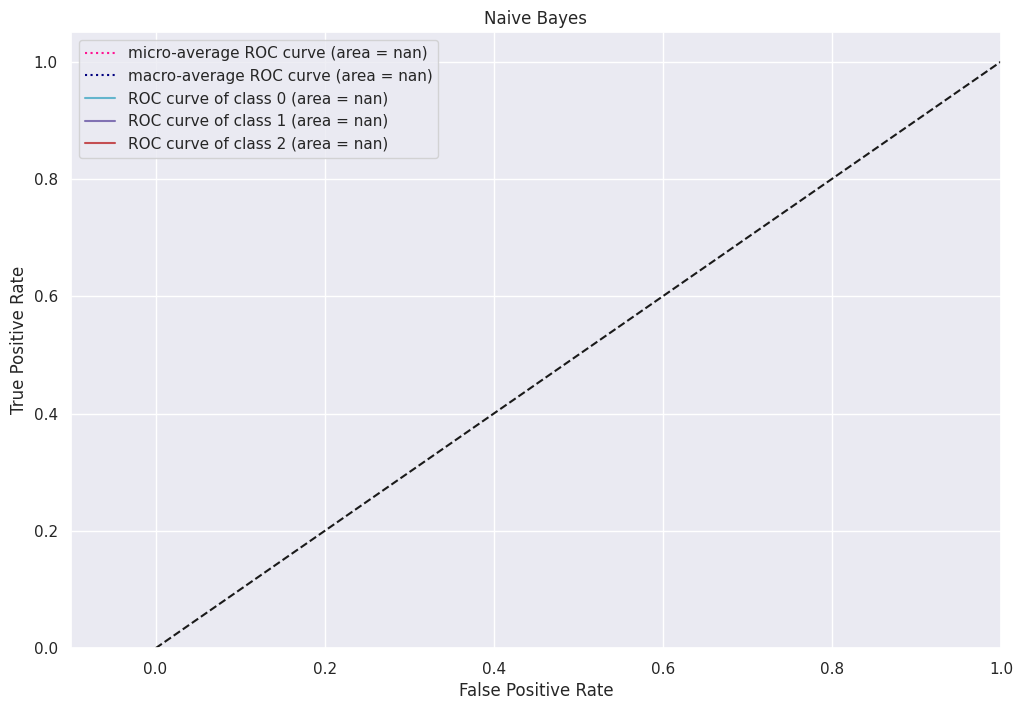

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

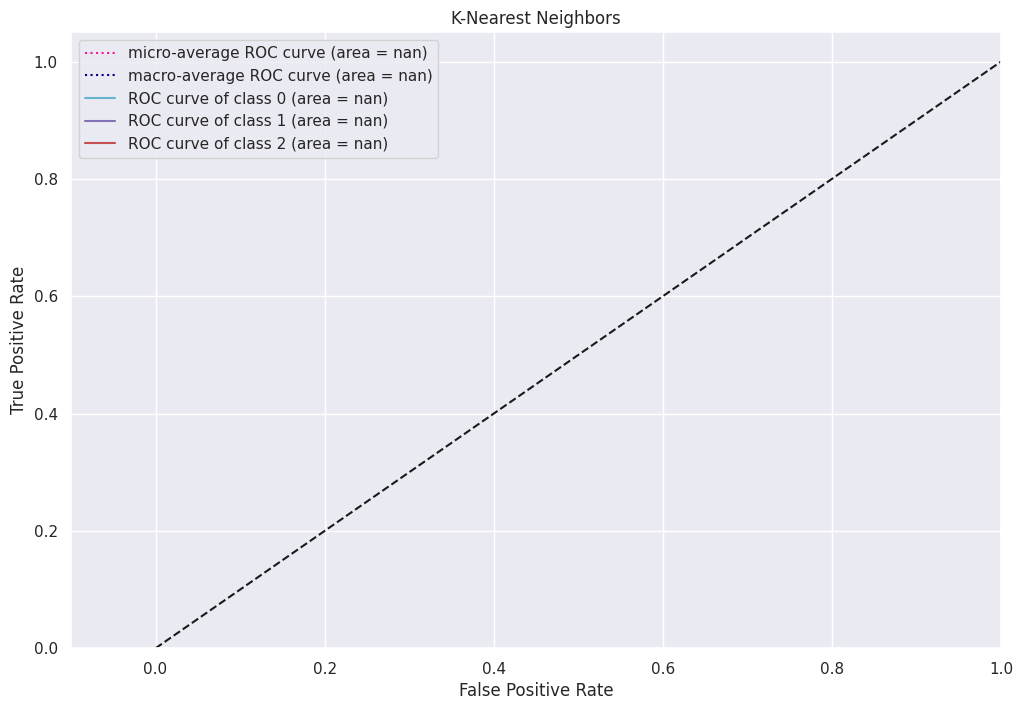

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

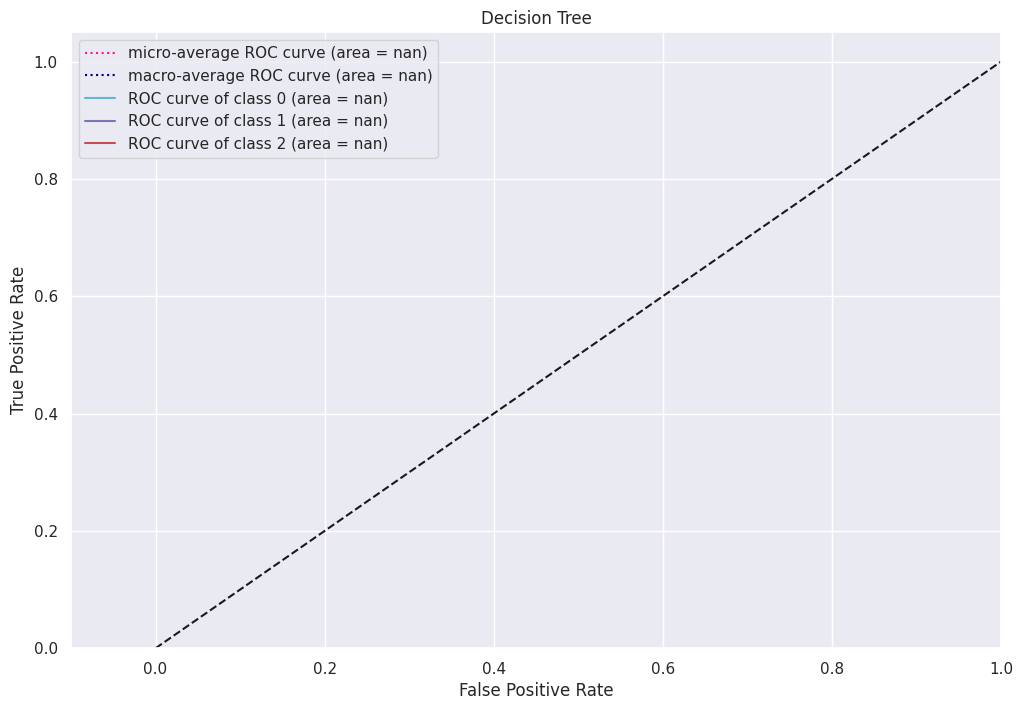

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

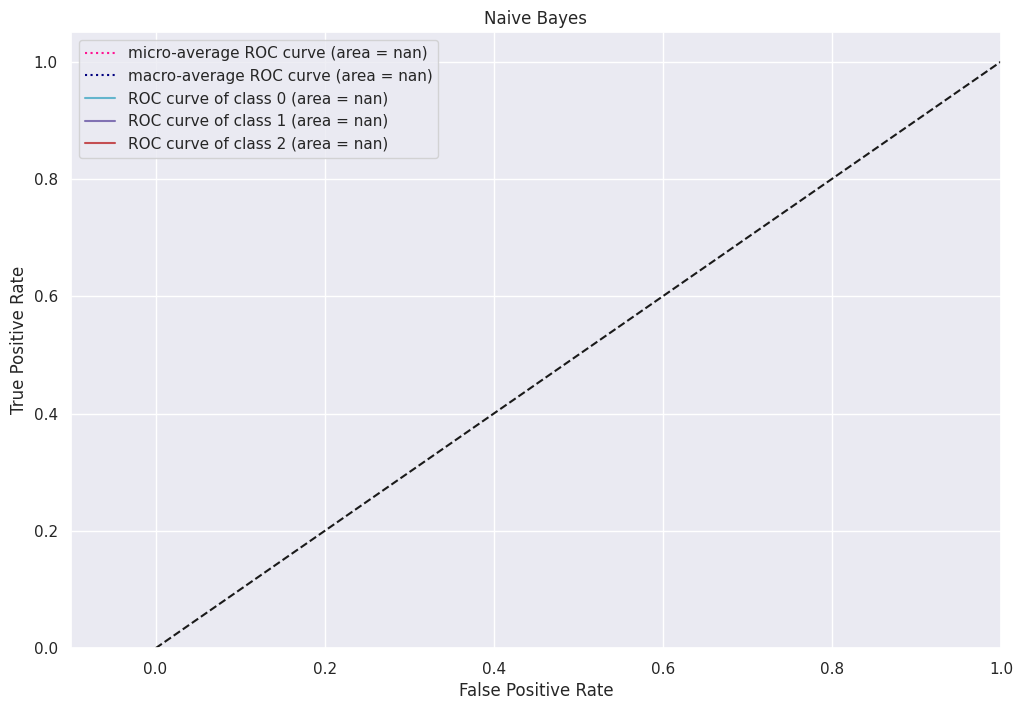

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

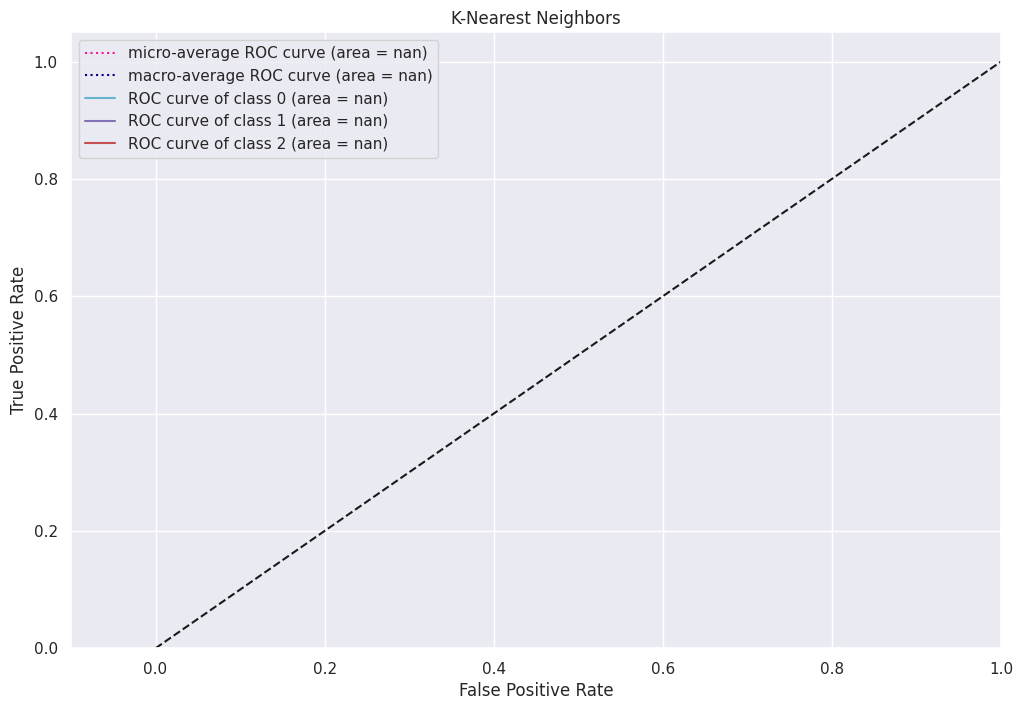

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

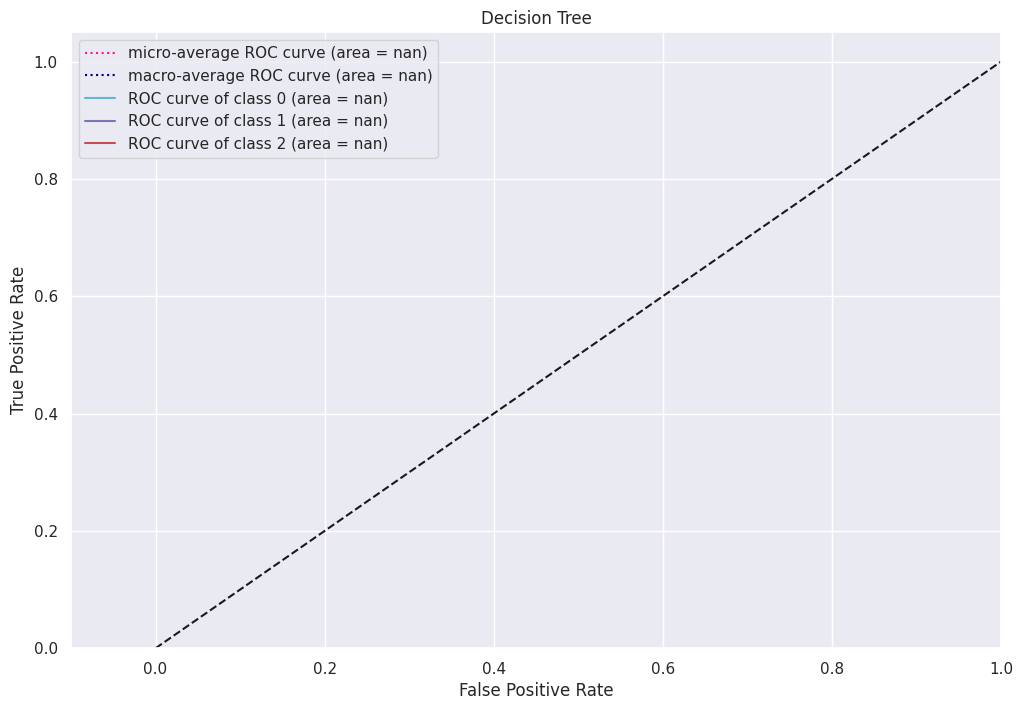

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

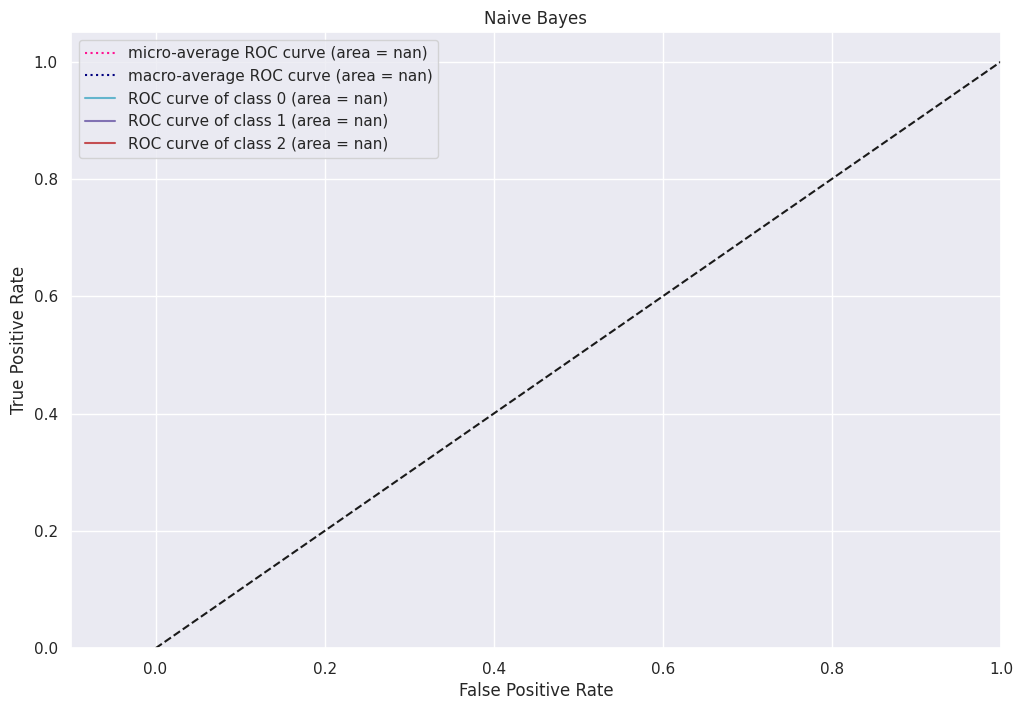

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

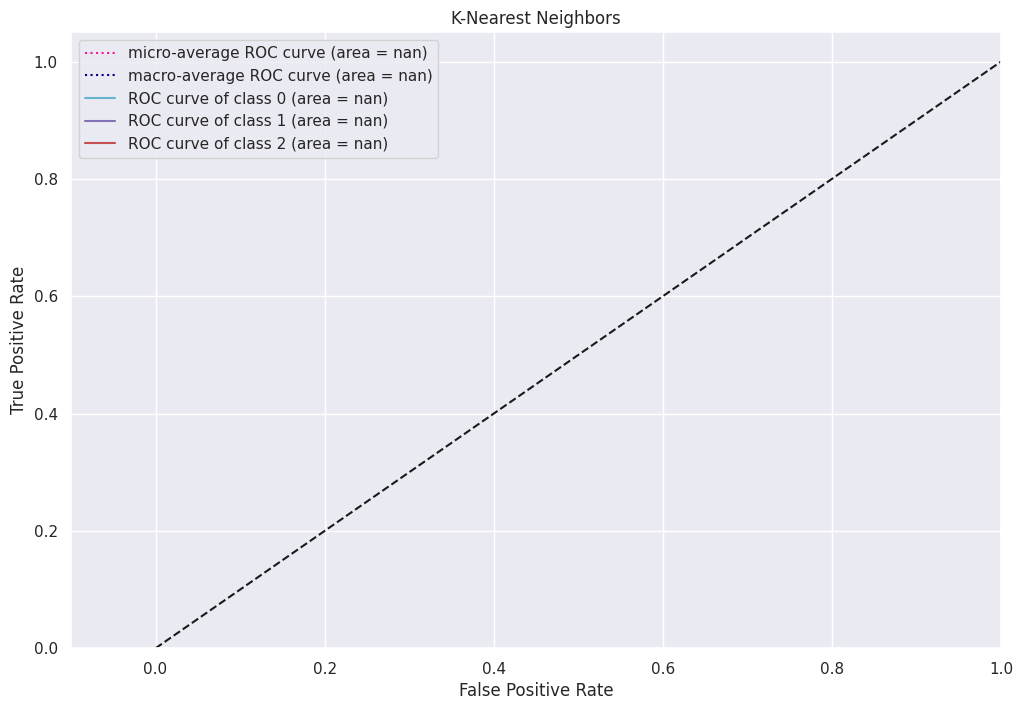

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

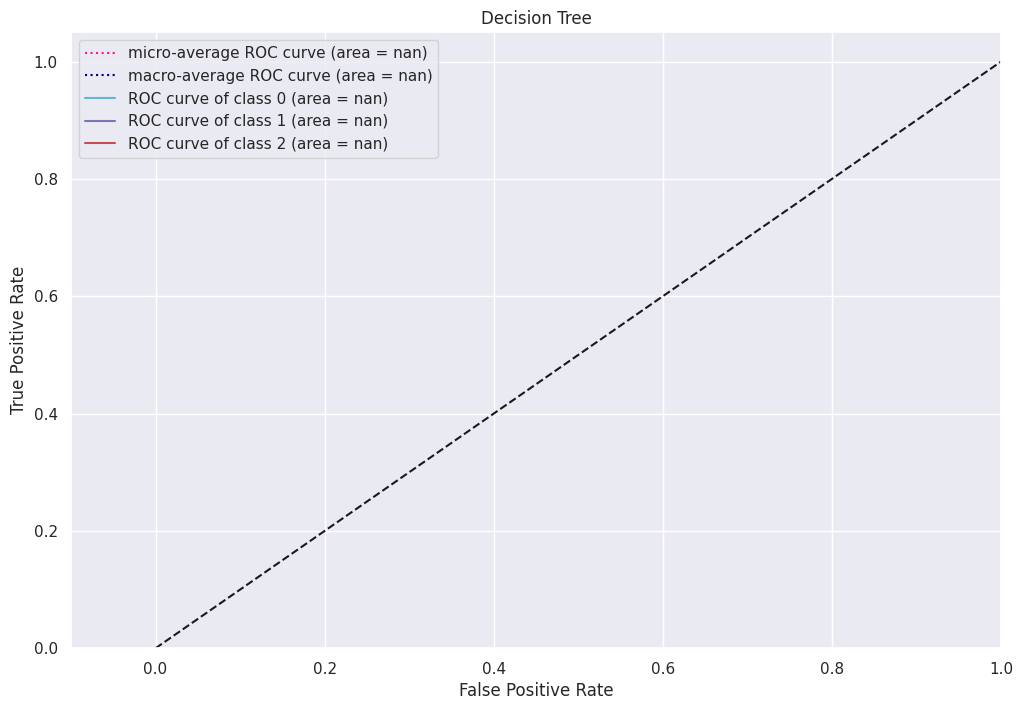

In [82]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

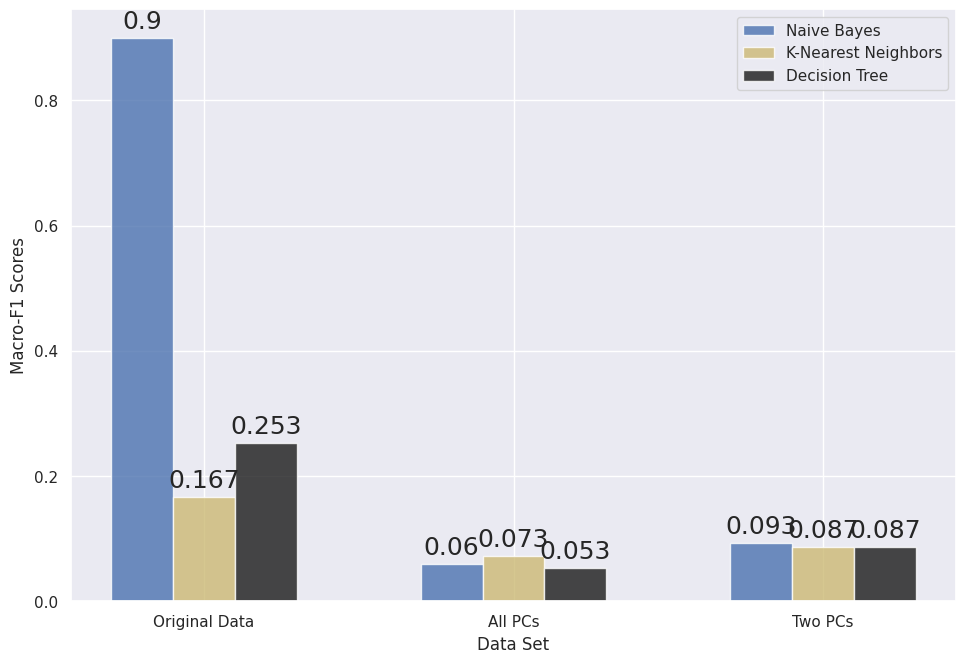

In [83]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.900, 0.060, 0.093)
KNN = (0.167, 0.073, 0.087)
DT = (0.253, 0.053, 0.087)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="upper right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()